In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

# compute the gamma again. see if they are the same.
## they are

In [11]:
pre = "/Users/weilu/Research/server/jan_2019/optimization/"
A_location = pre + "gammas_pairwise_only/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_A"
A = np.loadtxt(A_location)
B_location = pre + "gammas_pairwise_only/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_B"
B = np.loadtxt(B_location)

In [12]:
A.shape

(210,)

In [13]:
B.shape

(210, 210)

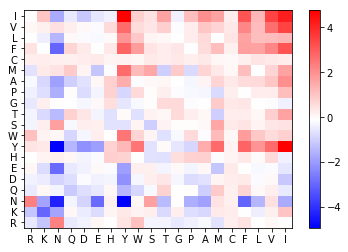

In [18]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization/"
gamma_location = pre + "gammas/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma = np.loadtxt(gamma_location)
plot_contact_well(gamma[:210], inferBound=True)
# plot_phi_pairwise_contact_well(gamma[:210], vmin=-1, vmax=1)



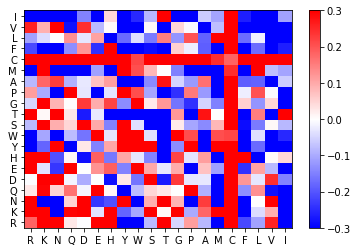

In [23]:
plot_contact_well(gamma[210:420], inferBound=False)

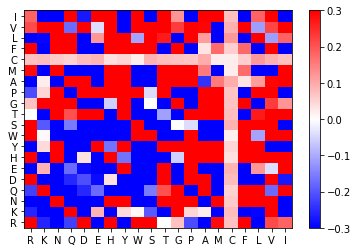

In [24]:
plot_contact_well(gamma[420:], inferBound=False)

# check the z score

## original gamma

In [ ]:
# convert gamma to gamma used by optimization
def read_gamma(gammaFile):
    data = np.loadtxt(gammaFile)
    gamma_direct = data[:210]
    gamma_mediated = data[210:]
    return gamma_direct, gamma_mediated
gamma_direct, gamma_mediated = read_gamma("/Users/weilu/openmmawsem/parameters/gamma.dat")

with open("/Users/weilu/Research/server_backup/jan_2019/optimization/gammas/original_gamma.dat", "w") as out:
    for x in gamma_direct:
        out.write(f"{x[0]}\n")
    for x in gamma_mediated:
        out.write(f"{x[0]}\n")   # protein
    for x in gamma_mediated:
        out.write(f"{x[1]}\n")
        
        


In [41]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization/"
os.chdir(pre)
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian(hamiltonian='phi_list.txt', training_set_file=pre+"database/cath-dataset-nonredundant-S20Clean.list", training_decoy_method='shuffle', num_decoys=1000, use_filtered_gammas=False)
os.chdir('/Users/weilu/opt/notebook/Optimization')



In [68]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization_result/original/"
# np.savetxt(pre+"z_scores", z_scores)
# np.savetxt(pre+"e_natives", e_natives)
# np.savetxt(pre+"e_mgs", e_mgs)
# np.savetxt(pre+"e_mg_stds", e_mg_stds)

In [80]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization_result/original/"
origin_z_scores = np.loadtxt(pre+"z_scores")
origin_e_natives = np.loadtxt(pre+"e_natives")

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 6.000e+00,
        1.400e+01, 2.000e+01, 2.000e+01, 3.900e+01, 7.700e+01, 1.070e+02,
        1.500e+02, 2.160e+02, 2.960e+02, 3.740e+02, 4.840e+02, 5.880e+02,
        7.500e+02, 8.880e+02, 9.160e+02, 1.028e+03, 1.034e+03, 1.004e+03,
        1.009e+03, 9.200e+02, 8.290e+02, 7.430e+02, 5.740e+02, 4.600e+02,
        3.870e+02, 2.680e+02, 2.100e+02, 1.880e+02, 1.340e+02, 9.200e+01,
        7.900e+01, 5.600e+01, 2.400e+01, 2.300e+01, 8.000e+00, 1.100e+01,
        2.000e+00, 5.000e+00]),
 array([-9.08485473, -8.86222509, -8.63959545, -8.41696582, -8.19433618,
        -7.97170654, -7.7490769 , -7.52644726, -7.30381762, -7.08118799,
        -6.85855835, -6.63592871, -6.41329907, -6.19066943, -5.96803979,
        -5.74541015, -5.52278052, -5.30015088, -5.07752124, -4.8548916 ,
        -4.63226196, -4.40963232, -4.18700269, -3.96437305, -3.74174341,
        -3.

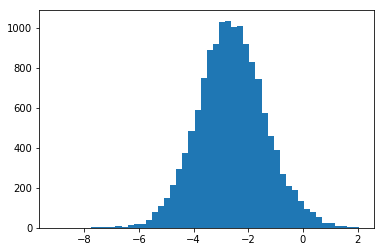

In [70]:
plt.hist(origin_z_scores, bins=50)

## iterative gamma

In [92]:
def gamma_format_convertion_iteration_to_simulation(iteration_gamma_location, gamma_for_simulation):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = np.loadtxt(iteration_gamma_location)
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1

In [93]:
# gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
# gamma = np.loadtxt(gamma_location)
# # convert gamma to gamma used by simulation
# with open("/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat", "w") as out:
#     c = 0
#     for i in range(20):
#         for j in range(i, 20):
#             out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
#             c += 1
#     out.write("\n")
#     for i in range(20):
#         for j in range(i, 20):
#             # protein, water
#             out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
#             c += 1
gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
gamma_format_convertion_iteration_to_simulation(gamma_location, gamma_for_simulation)

In [64]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization/"
os.chdir(pre)
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(hamiltonian='phi_list.txt', gamma_file_name="gammas/original_gamma.dat", training_set_file=pre+"database/cath-dataset-nonredundant-S20Clean.list", training_decoy_method='shuffle', num_decoys=1000, use_filtered_gammas=False)
os.chdir('/Users/weilu/opt/notebook/Optimization')




0 -3.6761576605329305
1000 -3.9315829208452135
2000 -2.790917743869025
3000 -2.8598515669726123
4000 -1.7169149340606502
5000 -4.0362105575586185
6000 -3.355124515903822
7000 -3.151516631511053
8000 -3.279586192370703
9000 -1.6322425790385746
10000 -3.876203691103808
11000 -1.0717461443536038
12000 -0.9232892094888296
13000 -1.8761595656441494
14000 -1.7030461704443758


In [50]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization_result/"
# np.savetxt(pre+"z_scores", z_scores)
# np.savetxt(pre+"e_natives", e_natives)
# np.savetxt(pre+"e_mgs", e_mgs)
# np.savetxt(pre+"e_mg_stds", e_mg_stds)

In [81]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization_result/"
z_scores = np.loadtxt(pre+"z_scores")
e_natives = np.loadtxt(pre+"e_natives")

(array([5.000e+00, 2.000e+00, 1.100e+01, 8.000e+00, 2.300e+01, 2.400e+01,
        5.600e+01, 7.900e+01, 9.200e+01, 1.340e+02, 1.880e+02, 2.100e+02,
        2.680e+02, 3.870e+02, 4.600e+02, 5.740e+02, 7.430e+02, 8.290e+02,
        9.200e+02, 1.009e+03, 1.004e+03, 1.034e+03, 1.028e+03, 9.160e+02,
        8.880e+02, 7.500e+02, 5.880e+02, 4.840e+02, 3.740e+02, 2.960e+02,
        2.160e+02, 1.500e+02, 1.070e+02, 7.700e+01, 3.900e+01, 2.000e+01,
        2.000e+01, 1.400e+01, 6.000e+00, 7.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2.04662719, -1.82399755, -1.60136791, -1.37873827, -1.15610864,
        -0.933479  , -0.71084936, -0.48821972, -0.26559008, -0.04296044,
         0.17966919,  0.40229883,  0.62492847,  0.84755811,  1.07018775,
         1.29281739,  1.51544702,  1.73807666,  1.9607063 ,  2.18333594,
         2.40596558,  2.62859522,  2.85122486,  3.07385449,  3.29648413,
         3.

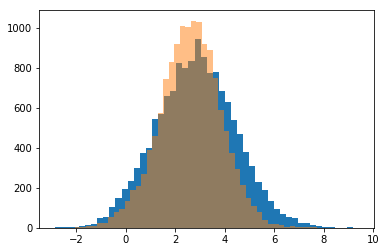

In [90]:
plt.hist(z_scores, bins=50)
plt.hist(-origin_z_scores, bins=50, alpha=0.5)

(array([2.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 2.700e+01,
        9.100e+01, 8.210e+02, 1.792e+03, 2.153e+03, 2.096e+03, 1.898e+03,
        1.531e+03, 1.147e+03, 7.770e+02, 5.660e+02, 3.970e+02, 2.540e+02,
        1.630e+02, 1.150e+02, 7.200e+01, 5.100e+01, 2.500e+01, 2.400e+01,
        1.800e+01, 6.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-92.73808737, -80.7967387 , -68.85539003, -56.91404136,
        -44.97269269, -33.03134402, -21.08999535,  -9.14864668,
          2.79270199,  14.73405066,  26.67539933,  38.616748  ,
         50.55809667,  62.49944534,  74.44079401,  86.38214268,
         98.32349135, 110.26484002, 122.20618869, 134.14753736,
        146.08888603, 158.0302347 , 169.97158337, 181.91

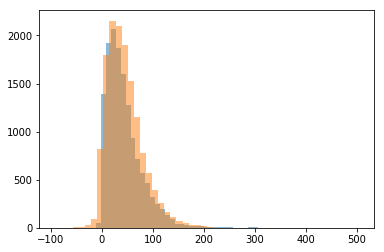

In [87]:
plt.hist(origin_e_natives, bins=50, alpha=0.5)
plt.hist(-e_natives, bins=50, alpha=0.5)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        6.000e+00, 1.800e+01, 2.400e+01, 2.500e+01, 5.100e+01, 7.200e+01,
        1.150e+02, 1.630e+02, 2.540e+02, 3.970e+02, 5.660e+02, 7.770e+02,
        1.147e+03, 1.531e+03, 1.898e+03, 2.096e+03, 2.153e+03, 1.792e+03,
        8.210e+02, 9.100e+01, 2.700e+01, 8.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00]),
 array([-504.32934613, -492.38799746, -480.44664879, -468.50530012,
        -456.56395145, -444.62260278, -432.68125411, -420.73990544,
        -408.79855677, -396.8572081 , -384.91585943, -372.97451076,
        -361.03316209, -349.09181342, -337.15046475, -325.20911608,
        -313.26776741, -301.32641874, -289.38507007, -277.4437214 ,
        -265.50237273, -253.56102406

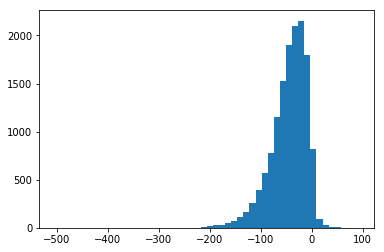

In [83]:
plt.hist(e_natives, bins=50)

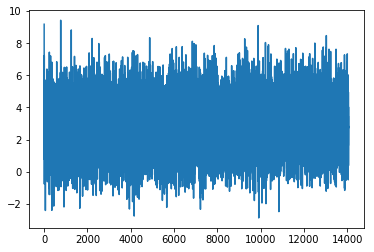

In [46]:
plt.plot(z_scores)

(array([  2.,   3.,   5.,   3.,   7.,  13.,  21.,  50.,  55., 105., 147.,
        192., 236., 298., 371., 396., 542., 566., 656., 684., 824., 798.,
        833., 944., 851., 772., 778., 684., 630., 537., 466., 378., 310.,
        228., 191., 133.,  93.,  68.,  55.,  50.,  23.,  23.,  12.,   9.,
          5.,   3.,   1.,   1.,   2.,   1.]),
 array([-2.87725855, -2.63118553, -2.38511251, -2.13903949, -1.89296647,
        -1.64689345, -1.40082043, -1.15474741, -0.90867439, -0.66260137,
        -0.41652835, -0.17045533,  0.07561769,  0.32169071,  0.56776373,
         0.81383676,  1.05990978,  1.3059828 ,  1.55205582,  1.79812884,
         2.04420186,  2.29027488,  2.5363479 ,  2.78242092,  3.02849394,
         3.27456696,  3.52063998,  3.766713  ,  4.01278602,  4.25885904,
         4.50493206,  4.75100509,  4.99707811,  5.24315113,  5.48922415,
         5.73529717,  5.98137019,  6.22744321,  6.47351623,  6.71958925,
         6.96566227,  7.21173529,  7.45780831,  7.70388133,  7.94995435,
 

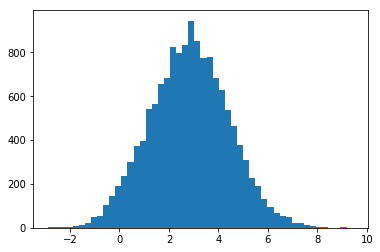

In [48]:
plt.hist(z_scores, bins=50)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 6.000e+00,
        1.400e+01, 2.000e+01, 2.000e+01, 3.900e+01, 7.700e+01, 1.070e+02,
        1.500e+02, 2.160e+02, 2.960e+02, 3.740e+02, 4.840e+02, 5.880e+02,
        7.500e+02, 8.880e+02, 9.160e+02, 1.028e+03, 1.034e+03, 1.004e+03,
        1.009e+03, 9.200e+02, 8.290e+02, 7.430e+02, 5.740e+02, 4.600e+02,
        3.870e+02, 2.680e+02, 2.100e+02, 1.880e+02, 1.340e+02, 9.200e+01,
        7.900e+01, 5.600e+01, 2.400e+01, 2.300e+01, 8.000e+00, 1.100e+01,
        2.000e+00, 5.000e+00]),
 array([-9.08485473, -8.86222509, -8.63959545, -8.41696582, -8.19433618,
        -7.97170654, -7.7490769 , -7.52644726, -7.30381762, -7.08118799,
        -6.85855835, -6.63592871, -6.41329907, -6.19066943, -5.96803979,
        -5.74541015, -5.52278052, -5.30015088, -5.07752124, -4.8548916 ,
        -4.63226196, -4.40963232, -4.18700269, -3.96437305, -3.74174341,
        -3.

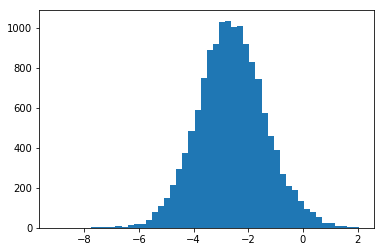

In [67]:
plt.hist(z_scores, bins=50)

In [37]:
z_scores

[9.176806422659627,
 1.4160319551803537,
 3.549127715611387,
 2.87451004431129,
 3.321335405695597,
 2.0384975567251065,
 7.225679722263541,
 4.529558441427112,
 4.360771070666416]

In [38]:
e_natives

[-61.22235649847627,
 -44.91198093174087,
 -72.87547855945124,
 -66.9709517915551,
 -73.97790586806678,
 -45.038155862369635,
 -143.89953061716577,
 -19.685589239842884,
 -77.3628932432046]

In [39]:
e_mgs

[0.01758998140349499,
 -14.303039459963896,
 -7.885889501453792,
 -15.242141103531637,
 -14.341997353149432,
 -9.325827401536266,
 6.1268012734696065,
 0.06003500993983165,
 57.85549417264697]

# only pair wise interaction.

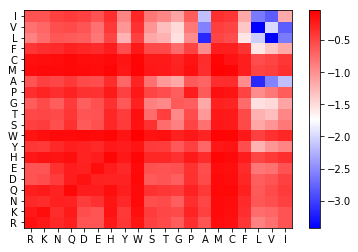

In [9]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization/"
phi_native_location = pre + "phis/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_phi_native_summary.txt"
phi_native = np.loadtxt(phi_native_location)
plot_contact_well(phi_native, inferBound=True)



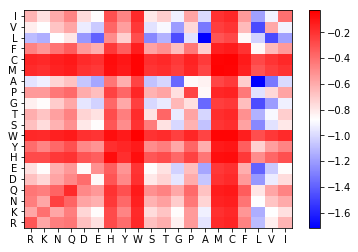

In [8]:
pre = "/Users/weilu/Research/server_backup/jan_2019/optimization/"
phi_decoy_location = pre + "phis/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_phi_decoy_summary.txt"
phi_decoy = np.loadtxt(phi_decoy_location)
plot_contact_well(phi_decoy, inferBound=True)




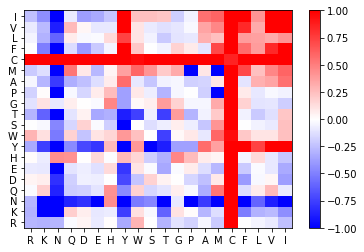

In [107]:
gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_pairwise_only/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_gamma"
gamma = np.loadtxt(gamma_location)

plot_phi_pairwise_contact_well(gamma[:210], vmin=-1, vmax=1)

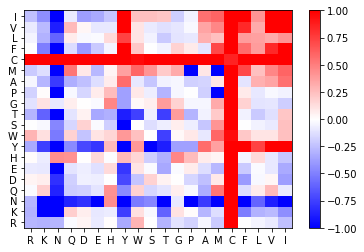

In [91]:
gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_gamma"
gamma = np.loadtxt(gamma_location)

plot_phi_pairwise_contact_well(gamma[:210], vmin=-1, vmax=1)

In [52]:
# convert gamma to gamma used by optimization
def read_gamma(gammaFile):
    data = np.loadtxt(gammaFile)
    gamma_direct = data[:210]
    gamma_mediated = data[210:]
    return gamma_direct, gamma_mediated
gamma_direct, gamma_mediated = read_gamma("/Users/weilu/openmmawsem/parameters/gamma.dat")

In [53]:
gamma_direct.shape

(210, 2)

In [54]:
gamma_mediated.shape

(210, 2)

In [55]:
with open("/Users/weilu/Research/server_backup/jan_2019/optimization/gammas/original_gamma.dat", "w") as out:
    for x in gamma_direct:
        out.write(f"{x[0]}\n")
    for x in gamma_mediated:
        out.write(f"{x[0]}\n")   # protein
    for x in gamma_mediated:
        out.write(f"{x[1]}\n")

In [106]:
gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma = np.loadtxt(gamma_location)
# convert gamma to gamma used by simulation
with open("/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat", "w") as out:
    c = 0
    for i in range(20):
        for j in range(i, 20):
            out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
            c += 1
    out.write("\n")
    for i in range(20):
        for j in range(i, 20):
            # protein, water
            out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
            c += 1

In [12]:
gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma = np.loadtxt(gamma_location)

In [13]:
len(gamma)

630

In [14]:
max(gamma)

9.68868

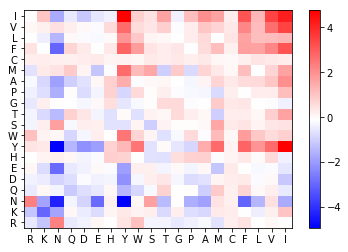

In [16]:
plot_contact_well(gamma[:210], inferBound=True)

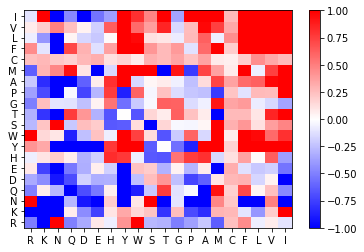

In [15]:
plot_phi_pairwise_contact_well(gamma[:210], vmin=-1, vmax=1)

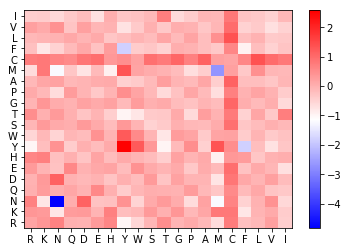

In [17]:
plot_contact_well(gamma[210:420], inferBound=True)

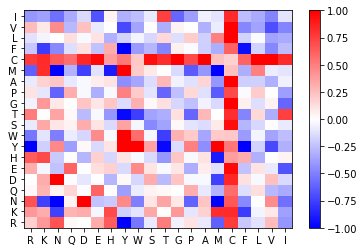

In [48]:
plot_phi_pairwise_contact_well(gamma[210:420], vmin=-1, vmax=1)

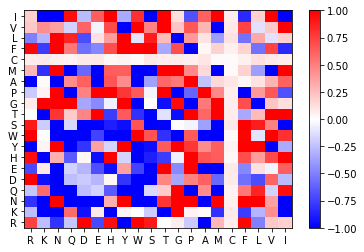

In [49]:
plot_phi_pairwise_contact_well(gamma[420:], vmin=-1, vmax=1)

In [57]:
gamma_filtered_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
gamma_filtered = np.loadtxt(gamma_filtered_location, dtype=complex)
gamma_filtered = gamma_filtered.astype(float)


In [60]:
g_max = max(gamma_filtered)
g_min = min(gamma_filtered)

In [62]:
gamma_filtered = 2*(gamma_filtered-g_min)/(g_max-g_min) - 1

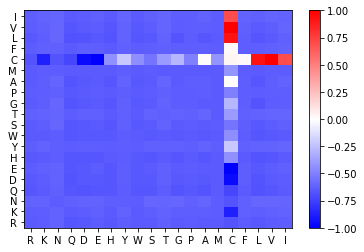

In [63]:
plot_phi_pairwise_contact_well(gamma_filtered[:210], vmin=-1, vmax=1)

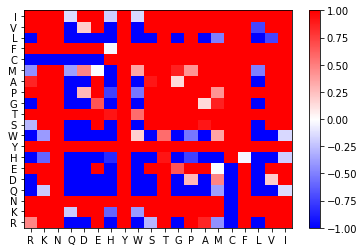

In [42]:
plot_phi_pairwise_contact_well(gamma_filtered[:210], vmin=-1, vmax=1)

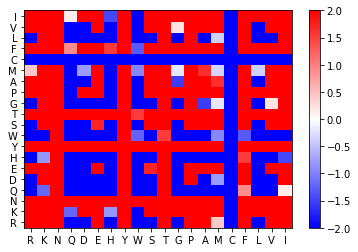

In [46]:
plot_phi_pairwise_contact_well(gamma_filtered[210:420], vmin=-2, vmax=2)

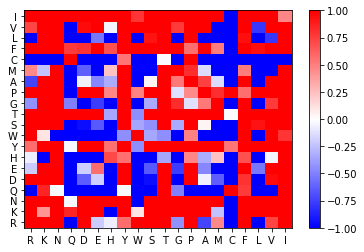

In [45]:
plot_phi_pairwise_contact_well(gamma_filtered[420:], vmin=-1, vmax=1)

# old mediated interaction.

In [51]:
gamma_location = "/Volumes/Wei_backup/nov_2018/optimization/gammas/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"


In [52]:
gamma = np.loadtxt(gamma_location)

In [53]:
len(gamma)

630

In [54]:
max(gamma)

1.68532

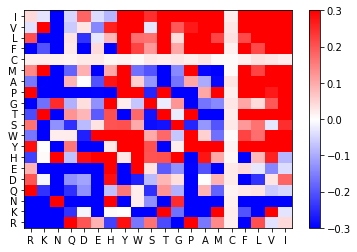

In [13]:
plot_phi_pairwise_contact_well(gamma[:210])

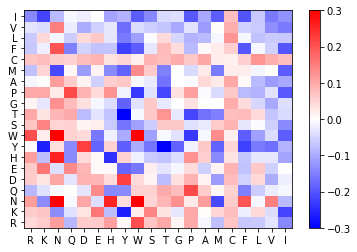

In [31]:
plot_phi_pairwise_contact_well(gamma[210:420])

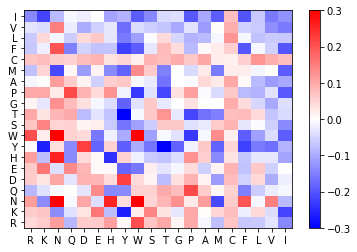

In [25]:
plot_phi_pairwise_contact_well(gamma[420:])

In [8]:
gamma_filtered_location = "/Volumes/Wei_backup/nov_2018/optimization/gammas/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
gamma_filtered = np.loadtxt(gamma_filtered_location, dtype=complex)
gamma_filtered = gamma_filtered.astype(float)

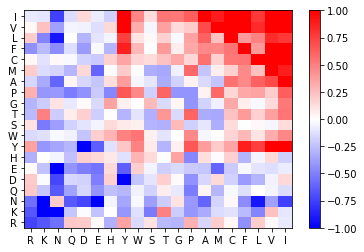

In [17]:
plot_phi_pairwise_contact_well(gamma_filtered[:210], vmin=-1, vmax=1)

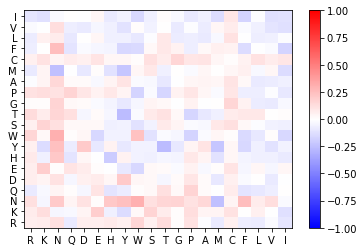

In [20]:
plot_phi_pairwise_contact_well(gamma_filtered[210:420], vmin=-1, vmax=1)

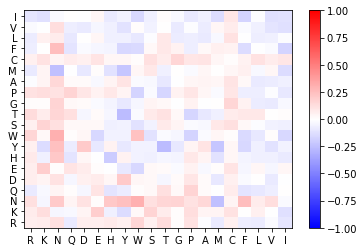

In [22]:
plot_phi_pairwise_contact_well(gamma_filtered[420:], vmin=-1, vmax=1)

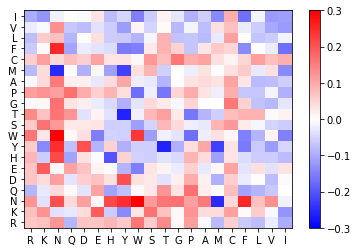

In [16]:
plot_phi_protein_mediated_contact_well(gamma_filtered[210:420])

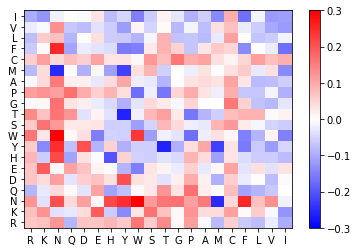

In [23]:
plot_phi_pairwise_contact_well(gamma_filtered[420:])

In [5]:
MYHOME = "/Users/weilu/Research/server/oct_2018/03_week/optimization/"



In [6]:
os.chdir(MYHOME)

In [7]:
pwd

'/Users/weilu/Research/server/oct_2018/03_week/optimization'

In [92]:
complete_proteins = "/Users/weilu/Research/server/oct_2018/03_week/optimization/database/cath-dataset-nonredundant-S20Clean.list"


individual_gammas_randomized_decoy=read_all_gammas("phi_list.txt", complete_proteins, training_decoy_method="shuffle", noise_filtering=True)



gammas/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10_gamma_filtered


In [51]:
len(individual_gammas_randomized_decoy[0])

210

In [90]:
def plot_phi_pairwise_contact_well(gammas, invert_sign=True, fix_colorbar=True, vmin=-0.3, vmax=0.3, fix_confidence_colorbar=True, confidence_vmin=0, confidence_vmax=1.0, plot_confidence=False, confidence_lower=None, confidence_upper=None):
    print("hi")
    size = 20
    interaction_matrix = np.zeros((size, size))
    i_content = 0
    for i in range(size):
        for j in range(i, size):
            index1 = hydrophobicity_map[inverse_res_type_map[i]]
            index2 = hydrophobicity_map[inverse_res_type_map[j]]
            interaction_matrix[index1][index2] = gammas[i_content]
            interaction_matrix[index2][index1] = gammas[i_content]
            i_content += 1
    print(i_content)
#     for i in range(size):
#         for j in range(i+1,size):
#             interaction_matrix[j][i] = 0
    print(interaction_matrix)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # The minus sign is here to be consistent with the way AWSEM thinks about gammas
    if invert_sign:
        interaction_matrix *= -1
    if fix_colorbar:
        cax = ax.pcolor(interaction_matrix, vmin=vmin,
                        vmax=vmax, cmap="bwr")
    else:
        cax = ax.pcolor(interaction_matrix, cmap="RdBu_r")
    fig.colorbar(cax)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(interaction_matrix.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(interaction_matrix.shape[1]) + 0.5, minor=False)

    ax.set_xticklabels(hydrophobicity_letters)
    ax.set_yticklabels(hydrophobicity_letters)

    if plot_confidence:
        confidence_interval_size = confidence_upper - confidence_lower
        confidence_matrix = np.zeros((size, size))
        i_content = 0
        for i in range(size):
            for j in range(i, size):
                index1 = hydrophobicity_map[inverse_res_type_map[i]]
                index2 = hydrophobicity_map[inverse_res_type_map[j]]
                confidence_matrix[index1][index2] = confidence_interval_size[i_content]
                confidence_matrix[index2][index1] = confidence_interval_size[i_content]
                i_content += 1

        fig = plt.figure()
        ax = fig.add_subplot(111)
        if fix_confidence_colorbar:
            cax = ax.pcolor(confidence_matrix, vmin=confidence_vmin,
                            vmax=confidence_vmax, cmap="RdBu_r")
        else:
            cax = ax.pcolor(confidence_matrix, cmap="RdBu_r")
        fig.colorbar(cax)

        # put the major ticks at the middle of each cell
        ax.set_yticks(np.arange(confidence_matrix.shape[0]) + 0.5, minor=False)
        ax.set_xticks(np.arange(confidence_matrix.shape[1]) + 0.5, minor=False)

        ax.set_xticklabels(hydrophobicity_letters)
        ax.set_yticklabels(hydrophobicity_letters)

    plt.savefig('direct_contact.pdf')
    plt.show()


In [61]:
len(individual_gammas_randomized_decoy[0])

210

hi
210
[[ 1.37000e-02  3.93610e-01 -1.51530e-01  6.58100e-02 -2.13660e-01
   9.34500e-02  1.35900e-02  1.48730e-01 -3.02550e-01  1.00920e-01
  -4.71300e-02  1.21100e-02  2.95690e-01  6.33200e-02  8.43000e-03
  -2.71832e+00  3.48380e-01  1.20800e-01  2.21350e-01  1.25310e-01]
 [ 0.00000e+00  5.51190e-01  2.38545e+00 -7.98900e-02  1.24100e-01
   3.06840e-01  2.11290e-01  2.62370e-01  1.50000e-04  3.14710e-01
   2.28810e-01 -3.74700e-02  3.69700e-02  2.52240e-01  3.40000e-01
  -2.99358e+00  3.36590e-01  2.69640e-01 -3.71600e-02  4.02690e-01]
 [ 0.00000e+00  0.00000e+00  5.15094e+00  1.70700e-01  8.12100e-02
   6.39400e-01  2.22750e-01  5.16561e+00  2.93560e-01  2.46190e-01
   1.73944e+00 -2.41400e-02  1.61263e+00  1.80120e-01  1.56097e+00
  -2.34163e+00  1.70391e+00  6.79900e-01  9.68920e-01  1.76988e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -5.35300e-02  1.71370e-01
   1.05410e-01 -1.40450e-01  1.11240e-01 -1.98750e-01 -1.24110e-01
   2.44850e-01 -1.74790e-01 -8.11200e-02  2.37000e-0

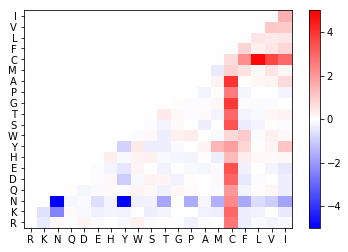

In [64]:
plot_phi_pairwise_contact_well(individual_gammas_randomized_decoy[0], vmin=-5,
                     vmax=5, invert_sign=True)

hi
210
[[ -0.13313  -0.5692   -3.18469   1.59871   0.62896  -0.17756   1.12711
   -1.78777   0.50831   0.42412  -1.88109   0.55152  -0.64924   0.06461
   -0.04022   1.2823   -0.72773   1.24975   0.05789  -1.43964]
 [ -0.5692   -1.57087  -2.06104  -0.13552  -1.23406  -2.39171   0.33282
   -2.71349   0.24281  -1.54424  -3.29247  -1.51338  -1.80063  -1.33521
   -0.3287    3.97658  -1.99778  -1.16451  -2.27115  -3.13958]
 [ -3.18469  -2.06104   3.03349  -2.11132  -3.77932  -3.6905   -1.12158
    1.98937  -0.57259  -4.1635   -2.74489  -4.89701  -1.65779  -4.79472
    0.48693   1.18672  -1.41197  -5.10469  -3.96129  -2.77076]
 [  1.59871  -0.13552  -2.11132   1.0257    2.57747   1.87084   1.47893
   -0.93274   0.9805    1.71771  -0.2886    2.41553   0.28343   1.9503
    0.3717    1.76486   0.07807   3.22828   1.30021   0.38012]
 [  0.62896  -1.23406  -3.77932   2.57747   0.69593   0.23454   1.52479
   -1.35456   1.28733   0.32295  -2.57141   1.19797  -0.3258    0.91579
   -0.05593   5.05305 

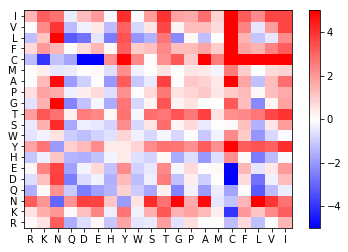

In [93]:
plot_phi_pairwise_contact_well(individual_gammas_randomized_decoy[0], vmin=-5,
                     vmax=5, invert_sign=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


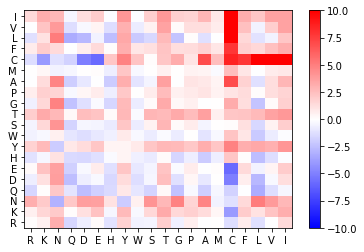

In [31]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


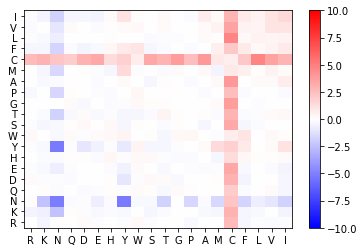

In [28]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


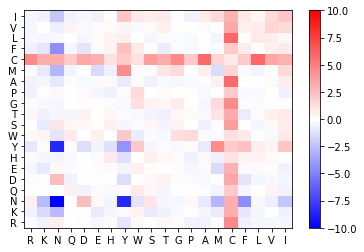

In [22]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


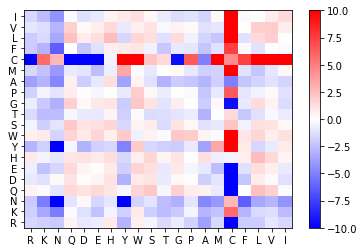

In [16]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

In [6]:
complete_proteins = "/Users/weilu/Research/server/oct_2018/03_week/optimization/database/cath-dataset-nonredundant-S20Clean.list"
A, B, gamma, filtered_B, filtered_gamma, filtered_lamb, P, lamb = calculate_A_B_and_gamma_xl23(complete_proteins, "phi_list.txt", decoy_method='shuffle', num_decoys=1000, noise_filtering=True, jackhmmer=False)
individual_gammas_randomized_decoy=read_all_gammas("phi_list.txt", complete_proteins, training_decoy_method="shuffle", noise_filtering=True)






KeyboardInterrupt: 

In [ ]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

Add fake "CB" atoms for GLycines

In [39]:
# transfer database
def transferPDB(file=None):
    if file == None:
        p_list = glob.glob("database/dompdb_back/*")
    else:
        with open(file) as f:
            content = f.readlines()
        # you may also want to remove whitespace characters like `\n` at the end of each line
        p_list = ["database/dompdb_back/" + x.strip() for x in content] 
    for p in p_list:
        new_p = p.replace("dompdb_back", "dompdb")
        os.system(f"cp {p} {new_p}.pdb")
# add location
def addLocation(source, target):
    with open(target, "w") as out:
        with open(source, "r") as f:
            for l in f:
                nl = "database/dompdb/" + l
                out.write(nl)
def convertTo4cName():
    with open("proteins_4c_name_list.txt", "w") as out:
        with open("proteins_name_list.txt", "r") as f:
            for l in f:
                nl = l[:4]
                out.write(nl+"\n")
# extract seq info from fa file
def extractSeqFromFa(size=7):
    os.system("mkdir database/S20_seq")
    with open("database/cath-dataset-nonredundant-S20.atom.fa", "r") as f:
        count = 0
        for l in f:
    #         if count > 10:
    #             break
            if count % 2 == 0:
                #extract protein id
                assert(l[0] == ">")
    #             print(l)
                if size == 7:
                    name = re.search('>cath\|(.*)\|(\w{7})\/(.*)', l).group(2)
                if size == 4:
                    name = re.search('>cath\|(.*)\|(\w{4})(.*)\/(.*)', l).group(2)
    #             name = "test"
    #             print(name)
            else:
                assert(l[0] != ">")
    #             print(l)
                with open(f"database/S20_seq/{name}.seq", "w") as out:
                    out.write(l)
            count += 1

                
# convertTo4cName()
# extractSeqFromFa()

In [30]:
p_list = glob.glob("database/dompdb_back/*")

In [34]:
len(p_list)

14432

In [ ]:
def removeExtraName():
    '''
    remove The 'B' or possible 'A' at position 16
    for example, chagne from
    ATOM    193  CB BMET A  30     -20.305 -21.245 -45.095  0.50 10.77
    to
    ATOM    193  CB  MET A  30     -20.305 -21.245 -45.095  0.50 10.77
    '''
    p_list = glob.glob("database/dompdb_origin/*")
    for name in p_list:
        toName = name.replace("dompdb_origin", "dompdb_cleaned")
        with open(toName, "w") as out:
            with open(name, "r") as f:
                for l in f:
                    tmp = list(l)
                    tmp[16] = " "
                    out.write(tmp.)



In [55]:

def removeResXfromlist():
    with open(f"database/S20_seq/{name}.seq", "w") as out:
        with open("database/cath-dataset-nonredundant-S20.atom.fa", "r") as f:
            count = 0
            for l in f:
        #         if count > 10:
        #             break
                if count % 2 == 0:
                    #extract protein id
                    assert(l[0] == ">")
        #             print(l)
                    tmp = l
        #             name = "test"
        #             print(name)
                else:
                    assert(l[0] != ">")
        #             print(l)
                    if "X" in l:
                        pass
                    else:
                        out.write(tmp)
                        out.write(l)
                count += 1

In [65]:
with open("database/cath-dataset-nonredundant-S20.list") as f:
    content = f.readlines()
pos = 0
for i in range(73):
    with open(f"proteins_name_list_{i}.txt", "w") as out:
        for ii in range(200):
            if pos < len(content):
                out.write(content[pos])
            pos += 1

In [67]:
os.system("cp database/dompdb/132lA00.pdb")

0

In [69]:
a = parse_pdb("2x6rB01")

In [81]:
def isComplete(a):
    for model in a:
        for chain in model:
            for res in chain:
    #             print(res)
                try:
                    if res["CA"] is not None:
                        pass
                    if res.get_resname() == "GLY" or res["CB"] is not None:
                        pass
                except:
                    print(res)
                    return 0
    return 1

In [85]:
len(p_list)

73

In [84]:
p_list = glob.glob("database/dompdb/*")
for p in p_list:
    a = parse_pdb(p[:-4])
    if isComplete(a):
        pass
    else:
        print(p)

<Residue HIS het=  resseq=-1 icode= >
database/dompdb/5m0pA00.pdb
<Residue GLN het=  resseq=3 icode= >
database/dompdb/5teeA01.pdb


In [29]:
transferPDB()

In [51]:
proteins = "proteins_name_list_1.txt"
proteins_location = "location_"+ proteins
transferPDB(proteins)
addLocation(proteins, proteins_location)
# os.chdir('database')
add_virtual_glycines_list(proteins_location)
generate_decoy_sequences(proteins)
evaluate_phis_over_training_set_Wei(proteins, "phi_list.txt", decoy_method='shuffle', max_decoys=1e+10, tm_only=False, num_processors=1)




shuffle 12asA00
shuffle 132lA00
shuffle 153lA00
shuffle 16pkA02
shuffle 16vpA00
shuffle 1914A00
shuffle 1a02F00
shuffle 1a05A00
shuffle 1a0aA00
shuffle 1a0cA00
shuffle 1a0hA01
shuffle 1a0iA01
shuffle 1a0pA01
shuffle 1a0rP01
shuffle 1a0sP00
shuffle 1a15A00
shuffle 1a1rA02
shuffle 1a1vA02
shuffle 1a1vA03
shuffle 1a1zA00
cyclic 12asA00
cyclic 132lA00
cyclic 153lA00
cyclic 16pkA02
cyclic 16vpA00
cyclic 1914A00
cyclic 1a02F00
cyclic 1a05A00
cyclic 1a0aA00
cyclic 1a0cA00
cyclic 1a0hA01
cyclic 1a0iA01
cyclic 1a0pA01
cyclic 1a0rP01
cyclic 1a0sP00
cyclic 1a15A00
cyclic 1a1rA02
cyclic 1a1vA02
cyclic 1a1vA03
cyclic 1a1zA00
[['phi_pairwise_contact_well', ['4.5', '6.5', '5.0', '10']]]
['12asA00', '132lA00', '153lA00', '16pkA02', '16vpA00', '1914A00', '1a02F00', '1a05A00', '1a0aA00', '1a0cA00', '1a0hA01', '1a0iA01', '1a0pA01', '1a0rP01', '1a0sP00', '1a15A00', '1a1rA02', '1a1vA02', '1a1vA03', '1a1zA00']
12asA00
132lA00
153lA00
16pkA02
16vpA00
1914A00
1a02F00
1a05A00
1a0aA00
1a0cA00
1a0hA01
1a0iA01
1a

In [52]:
proteins = "proteins_name_list_2.txt"
proteins_location = "location_"+ proteins
transferPDB(proteins)
addLocation(proteins, proteins_location)
# os.chdir('database')
add_virtual_glycines_list(proteins_location)
generate_decoy_sequences(proteins)
evaluate_phis_over_training_set_Wei(proteins, "phi_list.txt", decoy_method='shuffle', max_decoys=1e+10, tm_only=False, num_processors=1)





shuffle 1a22A00
shuffle 1a2nA02
shuffle 1a2vA03
shuffle 1a39A00
shuffle 1a3dA00
shuffle 1a3oA00
shuffle 1a3wA01
shuffle 1a3wA02
shuffle 1a48A01
shuffle 1a4eA00
shuffle 1a59A01
shuffle 1a5aA00
shuffle 1a5cA00
shuffle 1a5kC02
shuffle 1a5tA01
shuffle 1a5tA02
shuffle 1a5yA00
shuffle 1a62A01
shuffle 1a66A00
shuffle 1a6aB01
cyclic 1a22A00
cyclic 1a2nA02
cyclic 1a2vA03
cyclic 1a39A00
cyclic 1a3dA00
cyclic 1a3oA00
cyclic 1a3wA01
cyclic 1a3wA02
cyclic 1a48A01
cyclic 1a4eA00
cyclic 1a59A01
cyclic 1a5aA00
cyclic 1a5cA00
cyclic 1a5kC02
cyclic 1a5tA01
cyclic 1a5tA02
cyclic 1a5yA00
cyclic 1a62A01
cyclic 1a66A00
cyclic 1a6aB01
[['phi_pairwise_contact_well', ['4.5', '6.5', '5.0', '10']]]
['1a22A00', '1a2nA02', '1a2vA03', '1a39A00', '1a3dA00', '1a3oA00', '1a3wA01', '1a3wA02', '1a48A01', '1a4eA00', '1a59A01', '1a5aA00', '1a5cA00', '1a5kC02', '1a5tA01', '1a5tA02', '1a5yA00', '1a62A01', '1a66A00', '1a6aB01']
1a22A00
1a2nA02
1a2vA03
1a39A00
1a3dA00
1a3oA00
1a3wA01
1a3wA02
1a48A01
1a4eA00
1a59A01
1a5aA00
1a

190
gammas/complete_proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10_gamma_filtered


phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


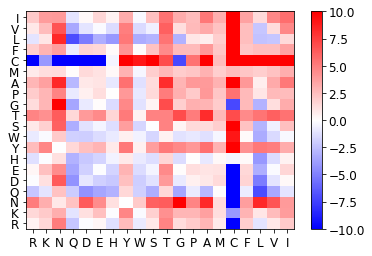

In [54]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


<Figure size 432x288 with 0 Axes>

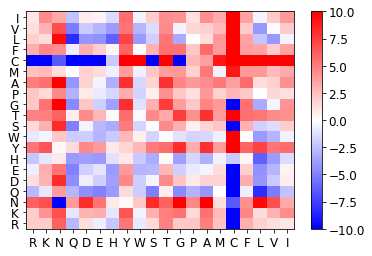

In [27]:
plot_all_gammas('phi_list.txt', individual_gammas_randomized_decoy, vmin=-10, vmax=10, invert_sign=True)

In [388]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
original_phis_native=read_all_gammas("phi_list.txt", "native_trainSetFiles.txt", training_decoy_method="TCR_randomization", noise_filtering=False, read_original_phis="native")

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


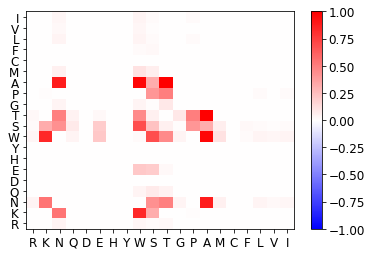

phi_protein_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


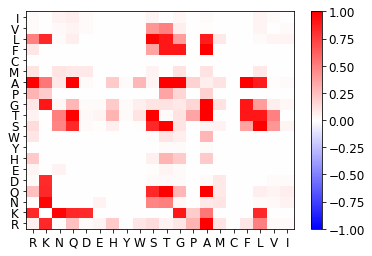

phi_water_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


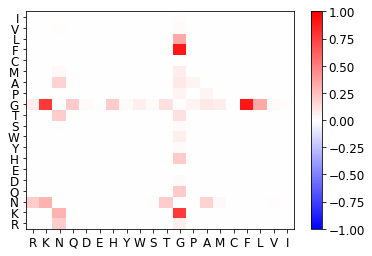

In [389]:
plot_all_gammas('phi_list.txt', original_phis_native, vmin=-1, vmax=1, invert_sign=False)

In [390]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
original_phis_decoy=read_all_gammas("phi_list.txt", "native_trainSetFiles.txt", training_decoy_method="TCR_randomization", noise_filtering=False, read_original_phis="decoy")

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


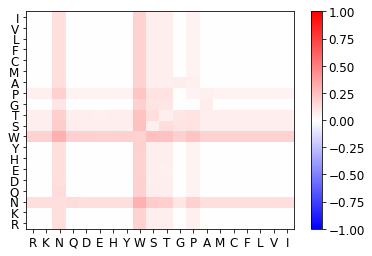

phi_protein_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


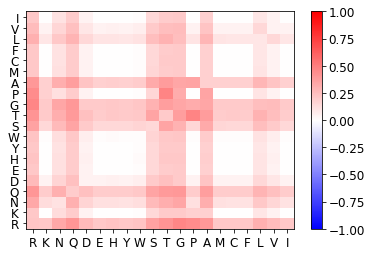

phi_water_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


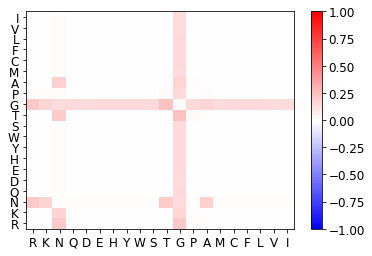

In [391]:
plot_all_gammas('phi_list.txt', original_phis_decoy, vmin=-1, vmax=1, invert_sign=False)

The optimization with decoy structures provided;

In [6]:
os.chdir('/opt/home/xl23/Working/Levine/jason/optimization/awsem/native_structures_pdbs_with_virtual_cbs/')
add_virtual_glycines_list("proteins_list.txt")

In [5]:
os.chdir('/opt/home/xl23/Working/Levine/jason/optimization/awsem/decoy_structures_pdbs_with_virtual_cbs/')
add_virtual_glycines_list("proteins_list.txt")

In [399]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
evaluate_phis_over_training_set_for_native_structures("native_trainSetFiles.txt", "phi_list.txt", decoy_method='TCR_modeling', max_decoys=1e+5, tm_only=False, num_processors=1, TCRmodeling=True)

[['phi_pairwise_contact_well', ['4.5', '6.5', '5.0', '10']], ['phi_protein_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']], ['phi_water_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']]]
['native', 'gBinder.1', 'gBinder.2', 'gBinder.3', 'gBinder.4', 'gBinder.5', 'gBinder.6', 'gBinder.7', 'gBinder.8', 'gBinder.9', 'gBinder.10', 'gBinder.11', 'gBinder.12', 'gBinder.13', 'gBinder.14', 'gBinder.15', 'gBinder.16', 'gBinder.17', 'gBinder.18', 'gBinder.19', 'gBinder.20', 'gBinder.21', 'gBinder.22', 'gBinder.23', 'gBinder.24', 'gBinder.25', 'gBinder.26', 'gBinder.27', 'gBinder.28', 'gBinder.29', 'gBinder.30', 'gBinder.31', 'gBinder.32', 'gBinder.33', 'gBinder.34', 'gBinder.35', 'gBinder.36', 'gBinder.37', 'gBinder.38', 'gBinder.39', 'gBinder.40', 'gBinder.41', 'gBinder.42', 'gBinder.43']
native
gBinder.1
gBinder.2
gBinder.3
gBinder.4
gBinder.5
gBinder.6
gBinder.7
gBinder.8
gBinder.9
gBinder.10
gBinder.11
gBinder.12
gBinder.13
gBinder.14
gBinder.15
gBinder.16

In [22]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
# Make a record for the decoy_training set;
totalNumDecoys = 6804
NumSamples = 3402
candidateIDX = np.random.choice(totalNumDecoys, NumSamples, replace=False)

try:
    os.remove("decoy_trainSetFiles.txt")
except OSError:
    pass

outfile = open("decoy_trainSetFiles.txt", 'a')
for i in np.nditer(candidateIDX):
    outfile.write("decoyBinder." + str(i) + "\n")
    
outfile.close()


In [157]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
# Make a record for the decoy_test set;
totalNumDecoys = 6804

try:
    os.remove("decoy_testSetFiles.txt")
except OSError:
    pass

outfile = open("decoy_testSetFiles.txt", 'a')

candidateIDX = np.loadtxt('decoy_trainSetIDX.txt')
for i in my_le_range(1, totalNumDecoys, 1):
    if i in candidateIDX[:,]:
        pass
    else:
        outfile.write("decoyBinder." + str(i) + "\n")

outfile.close()

In [4]:
# Generate the training decoy sets;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
evaluate_phis_over_training_set_for_decoy_structures("decoy_trainSetFiles.txt", "phi_list.txt", decoy_method='TCR_modeling', max_decoys=1e+5, tm_only=False, num_processors=1, TCRmodeling=True)

[['phi_pairwise_contact_well', ['4.5', '6.5', '5.0', '10']], ['phi_protein_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']], ['phi_water_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']]]
['decoyBinder.262', 'decoyBinder.3307', 'decoyBinder.5654', 'decoyBinder.3282', 'decoyBinder.3573', 'decoyBinder.6216', 'decoyBinder.2408', 'decoyBinder.169', 'decoyBinder.3187', 'decoyBinder.453', 'decoyBinder.2615', 'decoyBinder.1615', 'decoyBinder.4423', 'decoyBinder.3271', 'decoyBinder.3498', 'decoyBinder.6690', 'decoyBinder.272', 'decoyBinder.3013', 'decoyBinder.3438', 'decoyBinder.5745', 'decoyBinder.181', 'decoyBinder.202', 'decoyBinder.2175', 'decoyBinder.5059', 'decoyBinder.2753', 'decoyBinder.2806', 'decoyBinder.4780', 'decoyBinder.1742', 'decoyBinder.2931', 'decoyBinder.5544', 'decoyBinder.2125', 'decoyBinder.1110', 'decoyBinder.1230', 'decoyBinder.5349', 'decoyBinder.482', 'decoyBinder.6713', 'decoyBinder.5152', 'decoyBinder.2695', 'decoyBinder.4172', 'de

decoyBinder.262
decoyBinder.3307
decoyBinder.5654
decoyBinder.3282
decoyBinder.3573
decoyBinder.6216
decoyBinder.2408
decoyBinder.169
decoyBinder.3187
decoyBinder.453
decoyBinder.2615
decoyBinder.1615
decoyBinder.4423
decoyBinder.3271
decoyBinder.3498
decoyBinder.6690
decoyBinder.272
decoyBinder.3013
decoyBinder.3438
decoyBinder.5745
decoyBinder.181
decoyBinder.202
decoyBinder.2175
decoyBinder.5059
decoyBinder.2753
decoyBinder.2806
decoyBinder.4780
decoyBinder.1742
decoyBinder.2931
decoyBinder.5544
decoyBinder.2125
decoyBinder.1110
decoyBinder.1230
decoyBinder.5349
decoyBinder.482
decoyBinder.6713
decoyBinder.5152
decoyBinder.2695
decoyBinder.4172
decoyBinder.1352
decoyBinder.3074
decoyBinder.6745
decoyBinder.6700
decoyBinder.5294
decoyBinder.142
decoyBinder.1617
decoyBinder.6050
decoyBinder.3268
decoyBinder.3023
decoyBinder.2235
decoyBinder.3954
decoyBinder.4326
decoyBinder.2306
decoyBinder.3419
decoyBinder.5528
decoyBinder.1045
decoyBinder.6003
decoyBinder.6501
decoyBinder.5636
decoy

decoyBinder.6588
decoyBinder.6657
decoyBinder.1171
decoyBinder.5167
decoyBinder.1515
decoyBinder.5370
decoyBinder.1597
decoyBinder.3570
decoyBinder.4622
decoyBinder.168
decoyBinder.5862
decoyBinder.2928
decoyBinder.6476
decoyBinder.102
decoyBinder.525
decoyBinder.4393
decoyBinder.6345
decoyBinder.1441
decoyBinder.6408
decoyBinder.1813
decoyBinder.1571
decoyBinder.3120
decoyBinder.3861
decoyBinder.3777
decoyBinder.1197
decoyBinder.1757
decoyBinder.2075
decoyBinder.3024
decoyBinder.2406
decoyBinder.1904
decoyBinder.5297
decoyBinder.3378
decoyBinder.4004
decoyBinder.5245
decoyBinder.6758
decoyBinder.3919
decoyBinder.3651
decoyBinder.6347
decoyBinder.2630
decoyBinder.4439
decoyBinder.1526
decoyBinder.1603
decoyBinder.2966
decoyBinder.5818
decoyBinder.1505
decoyBinder.500
decoyBinder.4109
decoyBinder.3716
decoyBinder.3939
decoyBinder.4869
decoyBinder.4119
decoyBinder.3967
decoyBinder.3473
decoyBinder.2802
decoyBinder.5735
decoyBinder.3439
decoyBinder.995
decoyBinder.3471
decoyBinder.282
dec

decoyBinder.3347
decoyBinder.1957
decoyBinder.3209
decoyBinder.655
decoyBinder.5727
decoyBinder.135
decoyBinder.6254
decoyBinder.1484
decoyBinder.5020
decoyBinder.5501
decoyBinder.915
decoyBinder.437
decoyBinder.5358
decoyBinder.521
decoyBinder.600
decoyBinder.2515
decoyBinder.794
decoyBinder.5668
decoyBinder.4387
decoyBinder.4408
decoyBinder.6562
decoyBinder.146
decoyBinder.5212
decoyBinder.153
decoyBinder.6494
decoyBinder.3387
decoyBinder.87
decoyBinder.6236
decoyBinder.4222
decoyBinder.440
decoyBinder.586
decoyBinder.3427
decoyBinder.5971
decoyBinder.565
decoyBinder.4385
decoyBinder.1993
decoyBinder.4335
decoyBinder.1312
decoyBinder.6292
decoyBinder.821
decoyBinder.4437
decoyBinder.4162
decoyBinder.5941
decoyBinder.935
decoyBinder.3849
decoyBinder.425
decoyBinder.5023
decoyBinder.1772
decoyBinder.4460
decoyBinder.5051
decoyBinder.2456
decoyBinder.6053
decoyBinder.1902
decoyBinder.6553
decoyBinder.4520
decoyBinder.6193
decoyBinder.2142
decoyBinder.4510
decoyBinder.724
decoyBinder.652

decoyBinder.1952
decoyBinder.617
decoyBinder.4129
decoyBinder.4396
decoyBinder.5541
decoyBinder.2893
decoyBinder.4735
decoyBinder.6312
decoyBinder.5306
decoyBinder.2383
decoyBinder.4560
decoyBinder.3173
decoyBinder.3073
decoyBinder.2844
decoyBinder.2204
decoyBinder.1194
decoyBinder.1157
decoyBinder.350
decoyBinder.560
decoyBinder.289
decoyBinder.5872
decoyBinder.423
decoyBinder.190
decoyBinder.1058
decoyBinder.3962
decoyBinder.1935
decoyBinder.3338
decoyBinder.3218
decoyBinder.6144
decoyBinder.650
decoyBinder.889
decoyBinder.3832
decoyBinder.1427
decoyBinder.144
decoyBinder.4151
decoyBinder.3851
decoyBinder.4465
decoyBinder.4664
decoyBinder.4631
decoyBinder.2586
decoyBinder.378
decoyBinder.1119
decoyBinder.6448
decoyBinder.582
decoyBinder.5081
decoyBinder.5122
decoyBinder.5416
decoyBinder.6420
decoyBinder.2554
decoyBinder.4342
decoyBinder.5665
decoyBinder.4404
decoyBinder.6067
decoyBinder.3930
decoyBinder.4457
decoyBinder.2898
decoyBinder.5044
decoyBinder.5218
decoyBinder.1418
decoyBin

decoyBinder.6194
decoyBinder.6289
decoyBinder.1188
decoyBinder.4204
decoyBinder.2123
decoyBinder.6670
decoyBinder.3717
decoyBinder.3735
decoyBinder.884
decoyBinder.1967
decoyBinder.1876
decoyBinder.5686
decoyBinder.5434
decoyBinder.4262
decoyBinder.4769
decoyBinder.1862
decoyBinder.2453
decoyBinder.6363
decoyBinder.646
decoyBinder.4433
decoyBinder.3043
decoyBinder.2794
decoyBinder.318
decoyBinder.2908
decoyBinder.6741
decoyBinder.3032
decoyBinder.4807
decoyBinder.3779
decoyBinder.2223
decoyBinder.2486
decoyBinder.40
decoyBinder.585
decoyBinder.1478
decoyBinder.6314
decoyBinder.4191
decoyBinder.2111
decoyBinder.3908
decoyBinder.1447
decoyBinder.2278
decoyBinder.3166
decoyBinder.4862
decoyBinder.1295
decoyBinder.6365
decoyBinder.6510
decoyBinder.222
decoyBinder.4948
decoyBinder.4463
decoyBinder.1866
decoyBinder.3380
decoyBinder.4605
decoyBinder.547
decoyBinder.2567
decoyBinder.6636
decoyBinder.1102
decoyBinder.294
decoyBinder.2922
decoyBinder.6246
decoyBinder.3330
decoyBinder.6689
decoyB

decoyBinder.1454
decoyBinder.5049
decoyBinder.1343
decoyBinder.1674
decoyBinder.3905
decoyBinder.1780
decoyBinder.1738
decoyBinder.2943
decoyBinder.267
decoyBinder.774
decoyBinder.4584
decoyBinder.4061
decoyBinder.5811
decoyBinder.2986
decoyBinder.556
decoyBinder.2060
decoyBinder.4073
decoyBinder.5127
decoyBinder.2942
decoyBinder.5371
decoyBinder.6152
decoyBinder.3323
decoyBinder.3189
decoyBinder.2843
decoyBinder.2018
decoyBinder.2520
decoyBinder.5840
decoyBinder.3316
decoyBinder.2129
decoyBinder.257
decoyBinder.5885
decoyBinder.2916
decoyBinder.5213
decoyBinder.3712
decoyBinder.6142
decoyBinder.2958
decoyBinder.4656
decoyBinder.2886
decoyBinder.1944
decoyBinder.4124
decoyBinder.6482
decoyBinder.3155
decoyBinder.5383
decoyBinder.1613
decoyBinder.621
decoyBinder.4126
decoyBinder.55
decoyBinder.1260
decoyBinder.3686
decoyBinder.3030
decoyBinder.5100
decoyBinder.1760
decoyBinder.5431
decoyBinder.1781
decoyBinder.705
decoyBinder.3021
decoyBinder.2205
decoyBinder.491
decoyBinder.5451
decoyB

decoyBinder.1399
decoyBinder.3049
decoyBinder.4679
decoyBinder.873
decoyBinder.6794
decoyBinder.5187
decoyBinder.254
decoyBinder.125
decoyBinder.1773
decoyBinder.4752
decoyBinder.4916
decoyBinder.4734
decoyBinder.4966
decoyBinder.4594
decoyBinder.1273
decoyBinder.4100
decoyBinder.3702
decoyBinder.402
decoyBinder.4402
decoyBinder.1371
decoyBinder.2633
decoyBinder.2036
decoyBinder.1581
decoyBinder.6009
decoyBinder.4275
decoyBinder.5594
decoyBinder.1720
decoyBinder.4140
decoyBinder.1239
decoyBinder.4461
decoyBinder.1380
decoyBinder.5077
decoyBinder.3000
decoyBinder.5491
decoyBinder.3892
decoyBinder.1291
decoyBinder.2472
decoyBinder.2510
decoyBinder.1435
decoyBinder.2409
decoyBinder.1070
decoyBinder.3156
decoyBinder.5200
decoyBinder.3103
decoyBinder.2147
decoyBinder.4302
decoyBinder.3516
decoyBinder.2944
decoyBinder.4330
decoyBinder.4067
decoyBinder.3056
decoyBinder.6094
decoyBinder.1288
decoyBinder.631
decoyBinder.6005
decoyBinder.6296
decoyBinder.6270
decoyBinder.1867
decoyBinder.653
dec

Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt

In [158]:
# Generate the testing decoy sets;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
evaluate_phis_over_training_set_for_decoy_structures("decoy_testSetFiles.txt", "phi_list.txt", decoy_method='TCR_modeling', max_decoys=1e+5, tm_only=False, num_processors=1, TCRmodeling=True)

[['phi_pairwise_contact_well', ['4.5', '6.5', '5.0', '10']], ['phi_protein_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']], ['phi_water_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']]]
['decoyBinder.1', 'decoyBinder.4', 'decoyBinder.6', 'decoyBinder.8', 'decoyBinder.9', 'decoyBinder.14', 'decoyBinder.15', 'decoyBinder.16', 'decoyBinder.17', 'decoyBinder.19', 'decoyBinder.20', 'decoyBinder.22', 'decoyBinder.23', 'decoyBinder.29', 'decoyBinder.32', 'decoyBinder.35', 'decoyBinder.36', 'decoyBinder.41', 'decoyBinder.42', 'decoyBinder.44', 'decoyBinder.45', 'decoyBinder.46', 'decoyBinder.47', 'decoyBinder.49', 'decoyBinder.50', 'decoyBinder.52', 'decoyBinder.54', 'decoyBinder.58', 'decoyBinder.59', 'decoyBinder.60', 'decoyBinder.62', 'decoyBinder.68', 'decoyBinder.69', 'decoyBinder.70', 'decoyBinder.73', 'decoyBinder.75', 'decoyBinder.78', 'decoyBinder.79', 'decoyBinder.81', 'decoyBinder.83', 'decoyBinder.84', 'decoyBinder.86', 'decoyBinder.89', 'decoyB

decoyBinder.1
decoyBinder.4
decoyBinder.6
decoyBinder.8
decoyBinder.9
decoyBinder.14
decoyBinder.15
decoyBinder.16
decoyBinder.17
decoyBinder.19
decoyBinder.20
decoyBinder.22
decoyBinder.23
decoyBinder.29
decoyBinder.32
decoyBinder.35
decoyBinder.36
decoyBinder.41
decoyBinder.42
decoyBinder.44
decoyBinder.45
decoyBinder.46
decoyBinder.47
decoyBinder.49
decoyBinder.50
decoyBinder.52
decoyBinder.54
decoyBinder.58
decoyBinder.59
decoyBinder.60
decoyBinder.62
decoyBinder.68
decoyBinder.69
decoyBinder.70
decoyBinder.73
decoyBinder.75
decoyBinder.78
decoyBinder.79
decoyBinder.81
decoyBinder.83
decoyBinder.84
decoyBinder.86
decoyBinder.89
decoyBinder.90
decoyBinder.94
decoyBinder.96
decoyBinder.97
decoyBinder.99
decoyBinder.100
decoyBinder.101
decoyBinder.103
decoyBinder.104
decoyBinder.106
decoyBinder.108
decoyBinder.110
decoyBinder.112
decoyBinder.114
decoyBinder.115
decoyBinder.116
decoyBinder.118
decoyBinder.119
decoyBinder.121
decoyBinder.122
decoyBinder.123
decoyBinder.127
decoyBinder.1

decoyBinder.1005
decoyBinder.1007
decoyBinder.1009
decoyBinder.1010
decoyBinder.1011
decoyBinder.1012
decoyBinder.1013
decoyBinder.1015
decoyBinder.1016
decoyBinder.1018
decoyBinder.1019
decoyBinder.1020
decoyBinder.1021
decoyBinder.1022
decoyBinder.1024
decoyBinder.1025
decoyBinder.1026
decoyBinder.1027
decoyBinder.1029
decoyBinder.1031
decoyBinder.1032
decoyBinder.1034
decoyBinder.1037
decoyBinder.1038
decoyBinder.1039
decoyBinder.1041
decoyBinder.1042
decoyBinder.1043
decoyBinder.1044
decoyBinder.1046
decoyBinder.1047
decoyBinder.1050
decoyBinder.1051
decoyBinder.1052
decoyBinder.1057
decoyBinder.1062
decoyBinder.1063
decoyBinder.1065
decoyBinder.1067
decoyBinder.1068
decoyBinder.1071
decoyBinder.1072
decoyBinder.1073
decoyBinder.1074
decoyBinder.1075
decoyBinder.1078
decoyBinder.1079
decoyBinder.1080
decoyBinder.1081
decoyBinder.1083
decoyBinder.1084
decoyBinder.1085
decoyBinder.1087
decoyBinder.1088
decoyBinder.1089
decoyBinder.1091
decoyBinder.1093
decoyBinder.1094
decoyBinder.10

decoyBinder.1972
decoyBinder.1973
decoyBinder.1974
decoyBinder.1976
decoyBinder.1977
decoyBinder.1980
decoyBinder.1982
decoyBinder.1985
decoyBinder.1987
decoyBinder.1989
decoyBinder.1991
decoyBinder.1996
decoyBinder.1997
decoyBinder.1998
decoyBinder.2003
decoyBinder.2006
decoyBinder.2007
decoyBinder.2010
decoyBinder.2012
decoyBinder.2013
decoyBinder.2014
decoyBinder.2021
decoyBinder.2025
decoyBinder.2026
decoyBinder.2028
decoyBinder.2029
decoyBinder.2031
decoyBinder.2035
decoyBinder.2037
decoyBinder.2038
decoyBinder.2040
decoyBinder.2041
decoyBinder.2043
decoyBinder.2049
decoyBinder.2050
decoyBinder.2053
decoyBinder.2058
decoyBinder.2059
decoyBinder.2061
decoyBinder.2062
decoyBinder.2065
decoyBinder.2069
decoyBinder.2074
decoyBinder.2076
decoyBinder.2077
decoyBinder.2078
decoyBinder.2081
decoyBinder.2083
decoyBinder.2086
decoyBinder.2089
decoyBinder.2090
decoyBinder.2092
decoyBinder.2094
decoyBinder.2095
decoyBinder.2096
decoyBinder.2098
decoyBinder.2100
decoyBinder.2101
decoyBinder.21

decoyBinder.2927
decoyBinder.2929
decoyBinder.2933
decoyBinder.2936
decoyBinder.2937
decoyBinder.2939
decoyBinder.2945
decoyBinder.2947
decoyBinder.2948
decoyBinder.2951
decoyBinder.2957
decoyBinder.2959
decoyBinder.2962
decoyBinder.2964
decoyBinder.2968
decoyBinder.2969
decoyBinder.2970
decoyBinder.2971
decoyBinder.2974
decoyBinder.2976
decoyBinder.2977
decoyBinder.2978
decoyBinder.2979
decoyBinder.2980
decoyBinder.2983
decoyBinder.2985
decoyBinder.2988
decoyBinder.2989
decoyBinder.2993
decoyBinder.2994
decoyBinder.2995
decoyBinder.2996
decoyBinder.3004
decoyBinder.3006
decoyBinder.3007
decoyBinder.3010
decoyBinder.3011
decoyBinder.3012
decoyBinder.3014
decoyBinder.3015
decoyBinder.3017
decoyBinder.3018
decoyBinder.3019
decoyBinder.3020
decoyBinder.3022
decoyBinder.3025
decoyBinder.3027
decoyBinder.3031
decoyBinder.3033
decoyBinder.3034
decoyBinder.3036
decoyBinder.3038
decoyBinder.3039
decoyBinder.3040
decoyBinder.3045
decoyBinder.3046
decoyBinder.3047
decoyBinder.3048
decoyBinder.30

decoyBinder.3885
decoyBinder.3887
decoyBinder.3893
decoyBinder.3900
decoyBinder.3902
decoyBinder.3903
decoyBinder.3910
decoyBinder.3912
decoyBinder.3913
decoyBinder.3916
decoyBinder.3918
decoyBinder.3921
decoyBinder.3922
decoyBinder.3923
decoyBinder.3926
decoyBinder.3927
decoyBinder.3935
decoyBinder.3940
decoyBinder.3944
decoyBinder.3945
decoyBinder.3947
decoyBinder.3950
decoyBinder.3951
decoyBinder.3952
decoyBinder.3953
decoyBinder.3956
decoyBinder.3959
decoyBinder.3961
decoyBinder.3963
decoyBinder.3965
decoyBinder.3968
decoyBinder.3969
decoyBinder.3972
decoyBinder.3973
decoyBinder.3974
decoyBinder.3976
decoyBinder.3980
decoyBinder.3983
decoyBinder.3986
decoyBinder.3987
decoyBinder.3988
decoyBinder.3989
decoyBinder.3991
decoyBinder.3992
decoyBinder.3996
decoyBinder.3997
decoyBinder.3998
decoyBinder.4000
decoyBinder.4001
decoyBinder.4005
decoyBinder.4006
decoyBinder.4007
decoyBinder.4008
decoyBinder.4009
decoyBinder.4012
decoyBinder.4014
decoyBinder.4015
decoyBinder.4017
decoyBinder.40

decoyBinder.4908
decoyBinder.4911
decoyBinder.4913
decoyBinder.4919
decoyBinder.4920
decoyBinder.4921
decoyBinder.4922
decoyBinder.4923
decoyBinder.4925
decoyBinder.4928
decoyBinder.4930
decoyBinder.4931
decoyBinder.4932
decoyBinder.4933
decoyBinder.4935
decoyBinder.4936
decoyBinder.4937
decoyBinder.4938
decoyBinder.4940
decoyBinder.4944
decoyBinder.4950
decoyBinder.4951
decoyBinder.4953
decoyBinder.4956
decoyBinder.4957
decoyBinder.4958
decoyBinder.4963
decoyBinder.4965
decoyBinder.4969
decoyBinder.4970
decoyBinder.4973
decoyBinder.4976
decoyBinder.4978
decoyBinder.4980
decoyBinder.4981
decoyBinder.4983
decoyBinder.4986
decoyBinder.4987
decoyBinder.4989
decoyBinder.4990
decoyBinder.4991
decoyBinder.4992
decoyBinder.4993
decoyBinder.4994
decoyBinder.4995
decoyBinder.4996
decoyBinder.4998
decoyBinder.5001
decoyBinder.5006
decoyBinder.5008
decoyBinder.5010
decoyBinder.5011
decoyBinder.5012
decoyBinder.5013
decoyBinder.5014
decoyBinder.5015
decoyBinder.5016
decoyBinder.5021
decoyBinder.50

decoyBinder.5878
decoyBinder.5879
decoyBinder.5883
decoyBinder.5884
decoyBinder.5886
decoyBinder.5889
decoyBinder.5891
decoyBinder.5893
decoyBinder.5895
decoyBinder.5897
decoyBinder.5898
decoyBinder.5901
decoyBinder.5902
decoyBinder.5904
decoyBinder.5906
decoyBinder.5907
decoyBinder.5908
decoyBinder.5909
decoyBinder.5912
decoyBinder.5916
decoyBinder.5917
decoyBinder.5918
decoyBinder.5919
decoyBinder.5920
decoyBinder.5921
decoyBinder.5922
decoyBinder.5924
decoyBinder.5925
decoyBinder.5926
decoyBinder.5928
decoyBinder.5929
decoyBinder.5933
decoyBinder.5934
decoyBinder.5937
decoyBinder.5940
decoyBinder.5944
decoyBinder.5948
decoyBinder.5950
decoyBinder.5951
decoyBinder.5952
decoyBinder.5953
decoyBinder.5954
decoyBinder.5960
decoyBinder.5962
decoyBinder.5963
decoyBinder.5967
decoyBinder.5968
decoyBinder.5969
decoyBinder.5976
decoyBinder.5978
decoyBinder.5982
decoyBinder.5983
decoyBinder.5985
decoyBinder.5986
decoyBinder.5987
decoyBinder.5989
decoyBinder.5990
decoyBinder.5991
decoyBinder.59

Process ForkPoolWorker-10:
Traceback (most recent call last):
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/home/xl23/bin/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrup

In [51]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
calculate_A_B_and_gamma_decoy_structures_provided("native_trainSetFiles.txt", "decoy_trainSetFiles.txt", "phi_list.txt", decoy_method='TCR_modeling', num_decoys=1000, noise_filtering=True, jackhmmer=False)

300


In [92]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
individual_gammas_decoy_structures_provided=read_all_gammas("phi_list.txt", "native_trainSetFiles.txt", training_decoy_method="TCR_modeling", noise_filtering=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


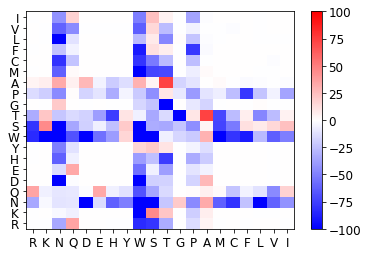

phi_protein_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


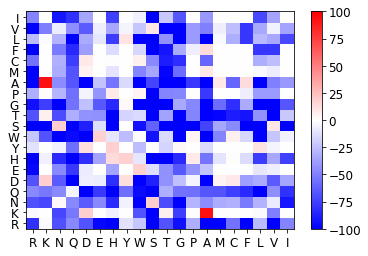

phi_water_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


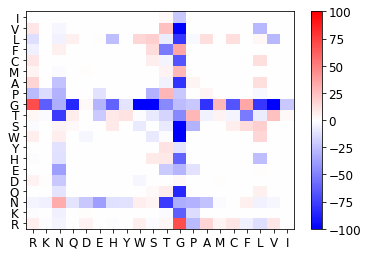

In [100]:
plot_all_gammas('phi_list.txt', individual_gammas_decoy_structures_provided, vmin=-100, vmax=100, invert_sign=True)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


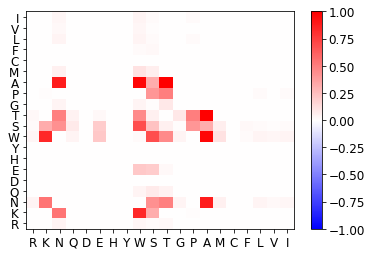

phi_protein_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


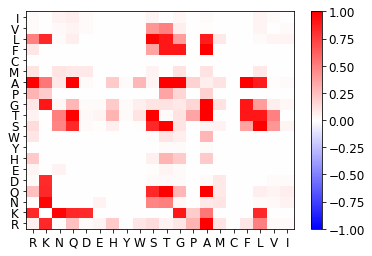

phi_water_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


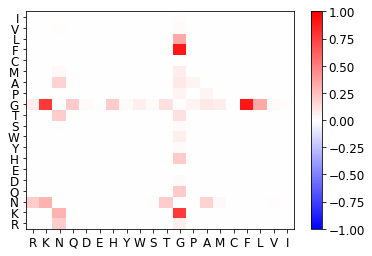

In [94]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
original_phis_native=read_all_gammas("phi_list.txt", "native_trainSetFiles.txt", training_decoy_method="TCR_modeling", noise_filtering=False, read_original_phis="native")
plot_all_gammas('phi_list.txt', original_phis_native, vmin=-1, vmax=1, invert_sign=False)

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


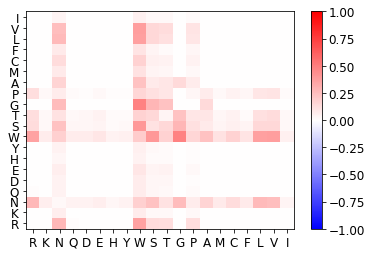

phi_protein_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


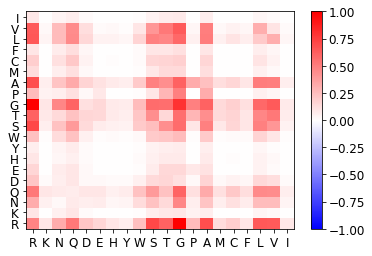

phi_water_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


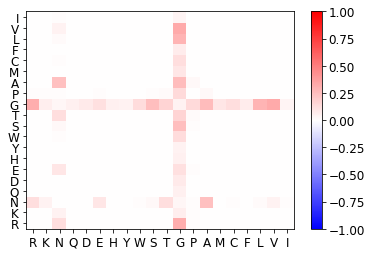

In [95]:
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
original_phis_decoy=read_all_gammas("phi_list.txt", "decoy_trainSetFiles.txt", training_decoy_method="TCR_modeling", noise_filtering=False, read_original_phis="decoy")
plot_all_gammas('phi_list.txt', original_phis_decoy, vmin=-1, vmax=1, invert_sign=False)


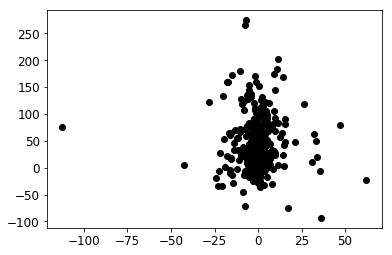

In [105]:

plt.scatter(individual_gammas_randomized_decoy, individual_gammas_decoy_structures_provided)

In [81]:
import scipy
scipy.stats.pearsonr([np.real(x) for x in individual_gammas_randomized], [np.real(x) for x in individual_gammas])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Evaluate the optimized AWSEM energy given test sets;

In [371]:
# Decoy structure provided
# Training Set;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
z_score, ave_e_native, ave_e_mgs, e_mg_std, e_mgs, e_natives = validate_hamiltonian_decoy_structures_provided(hamiltonian='phi_list.txt', native_training_set_file='native_trainSetFiles.txt', decoy_training_set_file='decoy_trainSetFiles.txt', training_decoy_method='TCR_modeling', use_filtered_gammas=True)

In [372]:
np.shape(e_mgs)

(3402,)

In [373]:
print (z_score, ave_e_native, ave_e_mgs, e_mg_std)


(0.7184209269103001+0j) (2989.698185128152+0j) (3352.425552919192+0j) 504.8953255732886


Text(0,0.5,'Normalized Histogram')

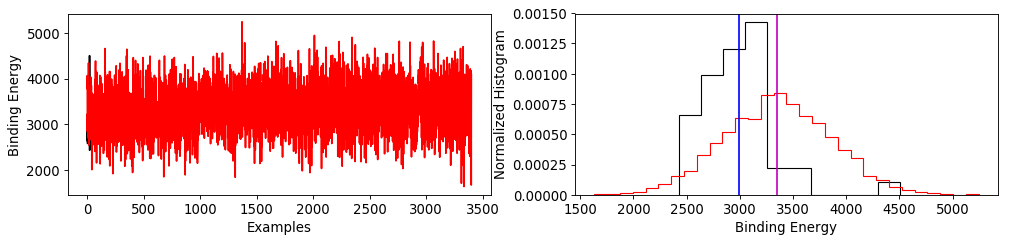

In [375]:
plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')
# Plot the e_mg
plt.subplot(1,2,1)

plt.plot(e_natives)
plt.plot(e_mgs)
plt.xlabel('Examples')
plt.ylabel('Binding Energy')

plt.subplot(1,2,2)
n, bins, patches = plt.hist(e_natives, density=True, histtype='step', bins=10)
plt.axvline(x=ave_e_native, color='b')
n, bins, patches = plt.hist(e_mgs, density=True, histtype='step', bins=30)
plt.axvline(x=ave_e_mgs, color='m')
plt.xlabel('Binding Energy')
plt.ylabel('Normalized Histogram')

In [366]:
# Decoy structure provided
# Test Set;

os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
z_score, ave_e_native, ave_e_mgs, e_mg_std, e_mgs, e_natives = validate_hamiltonian_decoy_structures_provided(hamiltonian='phi_list.txt', native_training_set_file='native_trainSetFiles.txt', decoy_training_set_file='decoy_trainSetFiles.txt', training_decoy_method='TCR_modeling', decoy_test_set_file='decoy_testSetFiles.txt', use_filtered_gammas=True)

In [367]:
print (z_score, ave_e_native, ave_e_mgs, e_mg_std)


(0.7176622283756144+0j) (2989.698185128152+0j) (3353.7505115694803+0j) 507.27530591283715


Text(0,0.5,'Normalized Histogram')

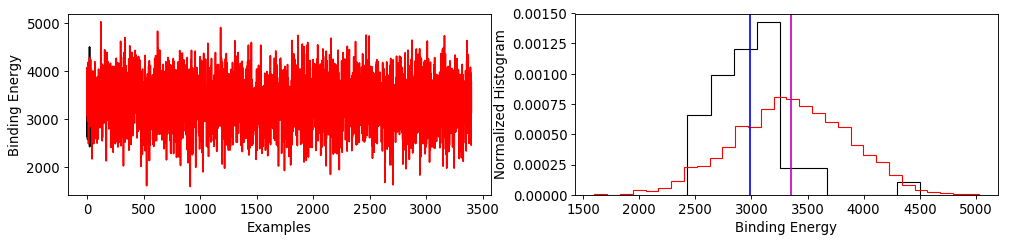

In [370]:
plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')
# Plot the e_mg
plt.subplot(1,2,1)

plt.plot(e_natives)
plt.plot(e_mgs)
plt.xlabel('Examples')
plt.ylabel('Binding Energy')

plt.subplot(1,2,2)
n, bins, patches = plt.hist(e_natives, density=True, histtype='step', bins=10)
plt.axvline(x=ave_e_native, color='b')
n, bins, patches = plt.hist(e_mgs, density=True, histtype='step', bins=30)
plt.axvline(x=ave_e_mgs, color='m')
plt.xlabel('Binding Energy')
plt.ylabel('Normalized Histogram')

In [392]:
# Randomized Decoy structures used for training set;
# Training set;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
z_score, e_native, e_mg, e_mg_std = validate_hamiltonian(hamiltonian='phi_list.txt', training_set_file='native_trainSetFiles.txt', training_decoy_method='TCR_randomization', num_decoys=1000, use_filtered_gammas=True)

In [393]:
print (z_score, e_native, e_mg, e_mg_std)

[(5.77503310553713+0j), (6.659949668347247+0j), (7.196347237150286+0j), (6.892680741777974+0j), (8.504890982413707+0j), (7.431510502314426+0j), (6.72981554684971+0j), (7.269139715496771+0j), (6.966888055051172+0j), (7.461793315157992+0j), (7.822038885101284+0j), (7.7836268226064576+0j), (8.065491970300327+0j), (3.3166403651705725+0j), (6.8875077015493185+0j), (7.5818501869587935+0j), (7.692620704929062+0j), (7.445993859190975+0j), (6.684736405912465+0j), (7.613398550213543+0j), (7.391690133175371+0j), (7.387623640047906+0j), (3.126502399922141+0j), (6.148020958941327+0j), (7.908353202953861+0j), (7.517150432418258+0j), (6.119772494659512+0j), (4.327179003140835+0j), (8.489364940852823+0j), (7.2562278492077645+0j), (7.8805072634102205+0j), (0.25042092249100917+0j), (6.229025762088947+0j), (7.621051526940986+0j), (8.06952625207014+0j), (5.855394069407128+0j), (4.776609931007368+0j), (0.06451279678608916+0j), (3.9813172053431103+0j), (8.202214028492802+0j), (3.380131642593263+0j), (7.1890

Text(0,0.5,'Normalized Histogram')

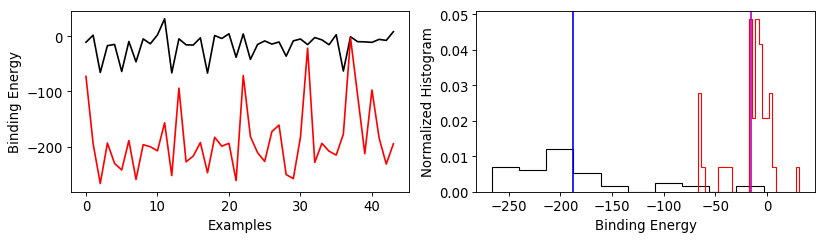

In [394]:
plt.figure(figsize=(12, 3), dpi= 80, facecolor='w', edgecolor='k')
# Plot the e_mg
plt.subplot(1,2,1)

plt.plot(e_mg)
plt.plot(e_native)
plt.xlabel('Examples')
plt.ylabel('Binding Energy')

plt.subplot(1,2,2)
n, bins, patches = plt.hist(e_native, density=True, histtype='step', bins=10)
plt.axvline(x=np.average(e_native), color='b')
n, bins, patches = plt.hist(e_mg, density=True, histtype='step', bins=30)
plt.axvline(x=np.average(e_mg), color='m')
plt.xlabel('Binding Energy')
plt.ylabel('Normalized Histogram')

In [400]:
# Randomized Decoy structures used for training set;
# Test set;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
z_score, ave_e_native, ave_e_mgs, e_mg_std, e_mgs, e_natives = validate_hamiltonian_decoy_structures_provided(hamiltonian='phi_list.txt', native_training_set_file='native_trainSetFiles.txt', decoy_training_set_file='decoy_trainSetFiles.txt', training_decoy_method='TCR_modeling', decoy_test_set_file='proteins_list.txt', use_filtered_gammas=True)

In [401]:
print (z_score, ave_e_native, ave_e_mgs, e_mg_std)


(5.635591799865859+0j) (-187.76566000651655+0j) (-10.872987656926394+0j) 31.38848210294448


Text(0,0.5,'Normalized Histogram')

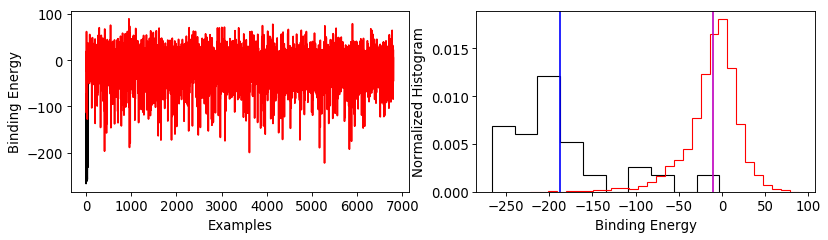

In [402]:
plt.figure(figsize=(12, 3), dpi= 80, facecolor='w', edgecolor='k')
# Plot the e_mg
plt.subplot(1,2,1)

plt.plot(e_natives)
plt.plot(e_mgs)
plt.xlabel('Examples')
plt.ylabel('Binding Energy')

plt.subplot(1,2,2)
n, bins, patches = plt.hist(e_natives, density=True, histtype='step', bins=10)
plt.axvline(x=ave_e_native, color='b')
n, bins, patches = plt.hist(e_mgs, density=True, histtype='step', bins=30)
plt.axvline(x=ave_e_mgs, color='m')
plt.xlabel('Binding Energy')
plt.ylabel('Normalized Histogram')

# Generate the test set from Mark Davis 2014 Paper Figure S4

In [292]:
# Generating the pseudo-GLY structures for the test set;

os.chdir('/opt/home/xl23/Working/Levine/jason/optimization/awsem/test_structures_pdbs_with_virtual_cbs/')
add_virtual_glycines_list("proteins_list.txt")

In [403]:
# Generate the testing decoy sets;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
evaluate_phis_over_training_set_for_decoy_structures("testSetFiles.txt", "phi_list.txt", decoy_method='TCR_modeling', max_decoys=1e+5, num_processors=1, TCRmodeling=True)

[['phi_pairwise_contact_well', ['4.5', '6.5', '5.0', '10']], ['phi_protein_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']], ['phi_water_mediated_contact_well', ['6.5', '9.5', '5.0', '10', '2.6', '7.0']]]
['testBinder.1', 'testBinder.2', 'testBinder.3', 'testBinder.4', 'testBinder.5', 'testBinder.6', 'testBinder.7', 'testBinder.8', 'testBinder.9', 'testBinder.10', 'testBinder.11', 'testBinder.12', 'testBinder.13', 'testBinder.14', 'testBinder.15', 'testBinder.16', 'testBinder.17']
testBinder.1
testBinder.2
testBinder.3
testBinder.4
testBinder.5
testBinder.6
testBinder.7
testBinder.8
testBinder.9
testBinder.10
testBinder.11
testBinder.12
testBinder.13
testBinder.14
testBinder.15
testBinder.16
testBinder.17


In [413]:
# Randomized Decoy structures used for training set;
# Test set;
os.chdir("/opt/home/xl23/Working/Levine/jason/optimization/awsem")
z_score, ave_e_native, ave_e_mgs, e_mg_std, e_mgs, e_natives = validate_hamiltonian_decoy_structures_provided(hamiltonian='phi_list.txt', native_training_set_file='native_trainSetFiles.txt', decoy_training_set_file='proteins_list.txt', training_decoy_method='TCR_modeling', decoy_test_set_file='testSetFiles.txt', use_filtered_gammas=True)

(1.455307585503256+0j) (-149.69064651566978+0j) (-89.57674764897348+0j) 41.30666222419811
[(-159.98147301839936+0j), (-151.0033212044783+0j), (-169.38741925076164+0j), (-79.84288482376613+0j), (-90.64700064221616+0j), (-80.59503416540615+0j), (-64.94771062427418+0j), (-86.46424647689167+0j), (-163.7628751907846+0j), (-59.03070762686842+0j), (-70.56727136824153+0j), (-54.6166186985738+0j), (-56.94866126078989+0j), (-50.55588810074348+0j), (-68.77631985159776+0j), (-63.258331712204374+0j), (-52.418946016551615+0j)]


Text(0,0.5,'Optimized Energy')

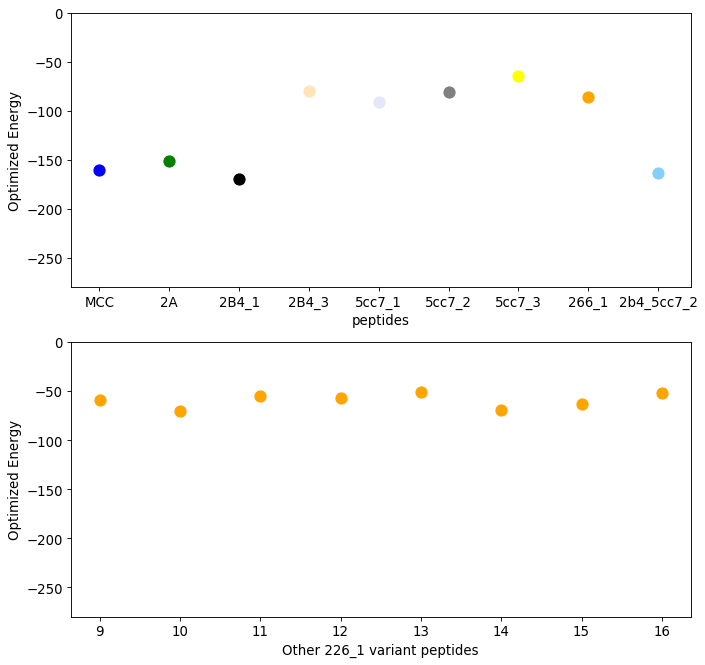

In [414]:
# Here is the results where I took 2B4_1, 2B4_3 and MCC out of the training set;
print (z_score, ave_e_native, ave_e_mgs, e_mg_std)
# e_natives_ = [ '%.3f' % elem for elem in e_natives ]
# e_natives = list(map(float, e_natives))
#e_mgs = [ '%.3f' % elem for elem in e_mgs ]
# e_mgs = list(map(float, e_mgs))
print(e_mgs)
data_X = []
data_Y = []
for counter, value in enumerate(e_mgs):
    data_X.append(counter)
    data_Y.append(value)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.tight_layout()
plt.subplot(2, 1, 1)
plt.scatter('MCC', data_Y[0], s=100, c='b')
plt.scatter('2A', data_Y[1], s=100, c='g')
plt.scatter('2B4_1', data_Y[2], s=100, c='k')
plt.scatter('2B4_3', data_Y[3], s=100, c='moccasin')
plt.scatter('5cc7_1', data_Y[4], s=100, c='lavender')
plt.scatter('5cc7_2', data_Y[5], s=100, c='gray')
plt.scatter('5cc7_3', data_Y[6], s=100, c='yellow')
plt.scatter('266_1', data_Y[7], s=100, c='orange')
plt.scatter('2b4_5cc7_2', data_Y[8], s=100, c='lightskyblue')

#plt.scatter(data_X[:9], data_Y[:9], s=100)
plt.ylim([-280, 0])
plt.xlabel('peptides')
plt.ylabel('Optimized Energy')

plt.subplot(2, 1, 2)
plt.scatter(data_X[9:], data_Y[9:], s=100, c='orange')
plt.ylim([-280, 0])
plt.xlabel('Other 226_1 variant peptides')
plt.ylabel('Optimized Energy')
#plt.plot(e_mgs)

(1.2811821808478292+0j) (-187.76566000651655+0j) (-117.88932807510817+0j) 54.54051186160531
[(-183.97204092968173+0j), (-99.74634321588891+0j), (-223.42835847475496+0j), (-81.08169754950983+0j), (-39.70244193093267+0j), (-61.93478754206812+0j), (-15.411852079649062+0j), (-168.1805708423163+0j), (-216.82857652831973+0j), (-121.03511455778997+0j), (-141.25113335779912+0j), (-101.25098448301868+0j), (-108.47980335100995+0j), (-108.5376767450153+0j), (-102.46430596222177+0j), (-110.05432196599477+0j), (-120.75856776086792+0j)]


Text(0,0.5,'Optimized Energy')

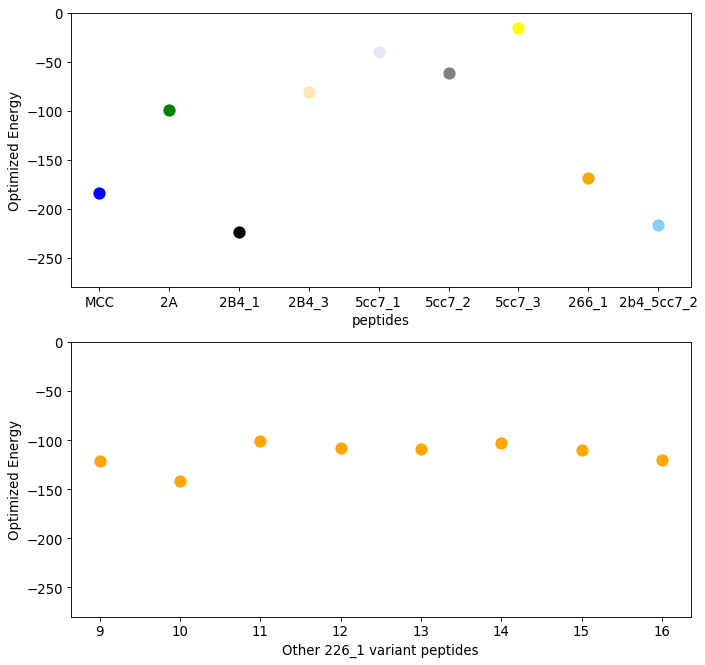

In [405]:
print (z_score, ave_e_native, ave_e_mgs, e_mg_std)
# e_natives_ = [ '%.3f' % elem for elem in e_natives ]
# e_natives = list(map(float, e_natives))
#e_mgs = [ '%.3f' % elem for elem in e_mgs ]
# e_mgs = list(map(float, e_mgs))
print(e_mgs)
data_X = []
data_Y = []
for counter, value in enumerate(e_mgs):
    data_X.append(counter)
    data_Y.append(value)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.tight_layout()
plt.subplot(2, 1, 1)
plt.scatter('MCC', data_Y[0], s=100, c='b')
plt.scatter('2A', data_Y[1], s=100, c='g')
plt.scatter('2B4_1', data_Y[2], s=100, c='k')
plt.scatter('2B4_3', data_Y[3], s=100, c='moccasin')
plt.scatter('5cc7_1', data_Y[4], s=100, c='lavender')
plt.scatter('5cc7_2', data_Y[5], s=100, c='gray')
plt.scatter('5cc7_3', data_Y[6], s=100, c='yellow')
plt.scatter('266_1', data_Y[7], s=100, c='orange')
plt.scatter('2b4_5cc7_2', data_Y[8], s=100, c='lightskyblue')

#plt.scatter(data_X[:9], data_Y[:9], s=100)
plt.ylim([-280, 0])
plt.xlabel('peptides')
plt.ylabel('Optimized Energy')

plt.subplot(2, 1, 2)
plt.scatter(data_X[9:], data_Y[9:], s=100, c='orange')
plt.ylim([-280, 0])
plt.xlabel('Other 226_1 variant peptides')
plt.ylabel('Optimized Energy')
#plt.plot(e_mgs)

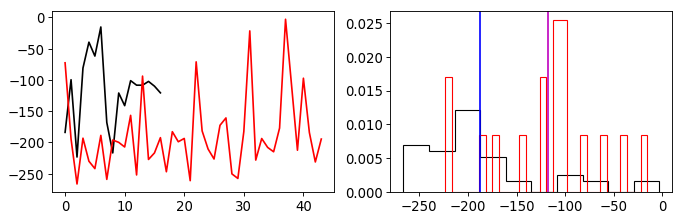

In [406]:
plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')
# Plot the e_mg
plt.subplot(1,2,1)

plt.plot(e_mgs)
plt.plot(e_natives)

plt.subplot(1,2,2)
n, bins, patches = plt.hist(e_natives, density=True, histtype='step', bins=10)
plt.axvline(x=ave_e_native, color='b')
n, bins, patches = plt.hist(e_mgs, density=True, histtype='step', bins=30)
plt.axvline(x=ave_e_mgs, color='m')

phi_pairwise_contact_well ['4.5', '6.5', '5.0', '10']


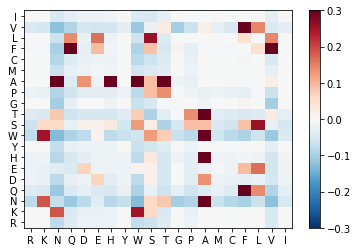

phi_protein_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


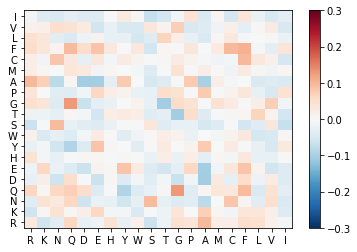

phi_water_mediated_contact_well ['6.5', '9.5', '5.0', '10', '2.6', '7.0']


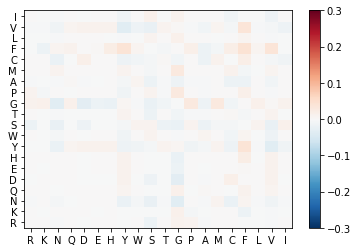

In [50]:
plot_all_gammas('phi_list.txt', individual_gammas)

# For the original AWSEM Gamma values;

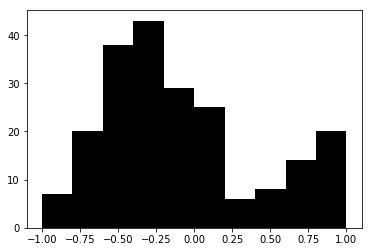

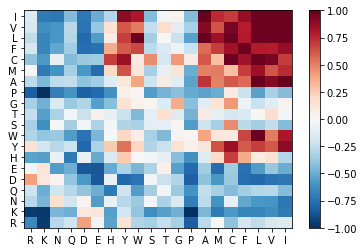

92.07103


In [79]:
os.chdir(gammas_directory)
gammas = np.loadtxt('gamma_default.dat')
direct_contact_gammas = gammas[:210,0]
plt.hist(direct_contact_gammas)
plt.rcParams.update({'font.size': 10})
plot_phi_pairwise_contact_well(direct_contact_gammas, vmin=-1, vmax=1, invert_sign=False)
print(np.sum(np.absolute(direct_contact_gammas)))

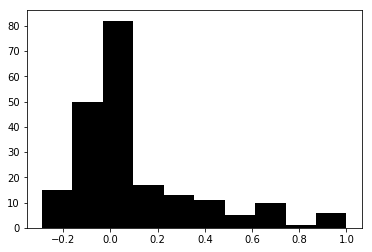

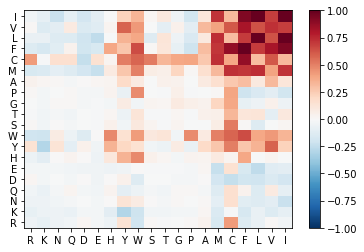

36.84286


In [82]:
os.chdir(gammas_directory)
gammas = np.loadtxt('gamma_default.dat')
protein_mediated_gammas = gammas[210:,0]

plt.hist(protein_mediated_gammas)
plt.rcParams.update({'font.size': 10})

plot_phi_protein_mediated_contact_well(protein_mediated_gammas, vmin=-1, vmax=1, invert_sign=False)
print(np.sum(np.absolute(protein_mediated_gammas)))

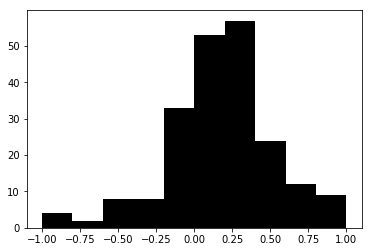

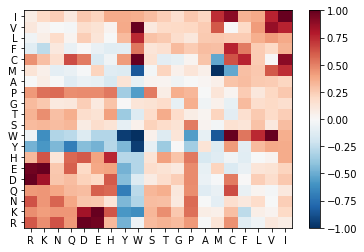

65.26993


In [83]:
os.chdir(gammas_directory)
gammas = np.loadtxt('gamma_default.dat')
water_mediated_gammas = gammas[210:,1]
plt.hist(water_mediated_gammas)
plt.rcParams.update({'font.size': 10})

plot_phi_water_mediated_contact_well(water_mediated_gammas, vmin=-1, vmax=1, invert_sign=False)
print(np.sum(np.absolute(water_mediated_gammas)))

In [ ]:
%matplotlib inline

In [ ]:
def f(x, a=5):
    return (a/x)**12 - (a/x)**6

In [66]:
a = 5

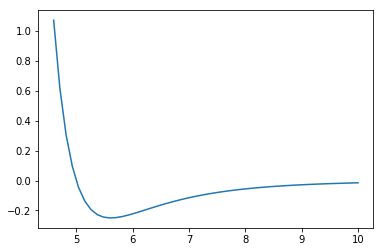

In [84]:
x = np.linspace(4.6, 10)
plt.plot(x, f(x))

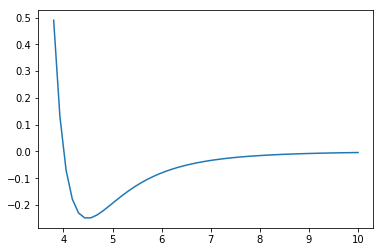

In [89]:
x = np.linspace(3.8, 10)
plt.plot(x, f(x, a=4))

In [64]:
def interaction_well(r, r_min, r_max, kappa):
    return 0.5 * (np.tanh(kappa * (r - r_min)) * np.tanh(kappa * (r_max - r))) + 0.5
def interaction_well_2(r, r_min, r_max, kappa):
    return 0.25 * (1 + np.tanh(kappa * (r-r_min))) * (1 + np.tanh(kappa*(r_max-r)))



In [65]:
kappa = 5
rmin = 4.5
rmax = 6.5

In [84]:
r = np.linspace(0, 10, 1000)

In [85]:
a = interaction_well(r, rmin, rmax, kappa)

In [86]:
b = interaction_well_2(r, rmin, rmax, kappa)

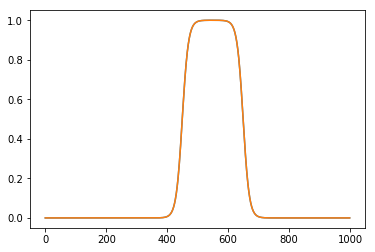

In [87]:
plt.plot(a)
plt.plot(b)

In [88]:
a -b

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [83]:
1.0 / (np.exp(kappa*(r-rmin)) + np.exp(kappa*(rmax-r)))

array([7.68120469e-15, 2.13101729e-14, 5.91213861e-14, 1.64022052e-13,
       4.55050794e-13, 1.26245966e-12, 3.50247582e-12, 9.71701292e-12,
       2.69581704e-11, 7.47907778e-11, 2.07494067e-10, 5.75656375e-10,
       1.59705897e-09, 4.43076369e-09, 1.22923869e-08, 3.41030999e-08,
       9.46131478e-08, 2.62487802e-07, 7.28226965e-07, 2.02033951e-06,
       5.60507889e-06, 1.55502491e-05, 4.31399359e-05, 1.19651437e-04,
       3.31252440e-04, 9.04329643e-04, 2.23433024e-03, 3.36459339e-03,
       2.06554578e-03, 8.19378732e-04, 2.99252376e-04, 1.08050665e-04,
       3.89553417e-05, 1.40417752e-05, 5.06134593e-06, 1.82435184e-06,
       6.57583630e-07, 2.37024567e-07, 8.54349812e-08, 3.07948500e-08,
       1.10999356e-08, 4.00094724e-09, 1.44213258e-09, 5.19813501e-10,
       1.87365627e-10, 6.75355259e-11, 2.43430310e-11, 8.77439168e-12,
       3.16271008e-12, 1.13999185e-12])